# **Analysis of Signal and Background Data**


In this section, we load data from two Excel files, representing signal and background datasets. 
The data is read using the `pandas` library, which provides powerful data analysis and manipulation tools.
Below is the code snippet used for loading the data, as well as a preview of the first few rows from each dataset.


In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load data from the Excel files
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")

# Display the first few rows of each DataFrame to understand their structure
print(signal_df.head())
print(background_df.head())


      jet1_pt     jet2_pt     jet3_pt     jet4_pt     jet5_pt     jet6_pt  \
0  173.034775  156.897537   86.575188   71.896362   68.743156   64.994034   
1  140.163620  134.187286  116.484482   92.105598   66.637825   64.564697   
2  455.637024  316.880127  186.414948  184.964386  142.811707  135.840546   
3  284.727386  240.010071  232.987961  109.618019   97.330498   84.789009   
4  307.271576  250.632828  182.247269  116.416428   75.660553   71.928635   

   numJets  numBJets    bjet1_pt  sumbjet_pt    Scalar_HT  missing_ET  \
0       14         3  156.897537  308.106750   937.702026  144.099930   
1       10         4  134.187286  351.839783   786.723145   15.960485   
2       14         5  316.880127  575.655579  1944.163818   46.435917   
3       15         2  240.010071  324.799072  1493.101440   48.165051   
4       11         4  250.632828  568.604431  1181.556274    1.918720   

   rat_MET_HT  deltaEta_jets  deltaPhi_jets  deltaEta_bjets  deltaPhi_bjets  \
0    4.705777      

## Identifying Common Variables

In this section, we display the column names from both the signal and background datasets. 
This helps to identify common variables that may be used for further analysis, such as feature comparison 
or classification tasks. Understanding the structure of each dataset is crucial for the next steps in our analysis.


In [3]:
# Display column names to identify common variables
print(signal_df.columns)
print(background_df.columns)


Index(['jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'jet5_pt', 'jet6_pt',
       'numJets', 'numBJets', 'bjet1_pt', 'sumbjet_pt', 'Scalar_HT',
       'missing_ET', 'rat_MET_HT', 'deltaEta_jets', 'deltaPhi_jets',
       'deltaEta_bjets', 'deltaPhi_bjets', 'deltaR_jets', 'deltaR_bjets',
       'top_mass'],
      dtype='object')
Index(['jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'jet5_pt', 'jet6_pt',
       'bjet1_pt', 'sumbjet_pt', 'Scalar_HT', 'missing_ET', 'rat_MET_HT',
       'numJets', 'numBJets', 'deltaEta_jets', 'deltaPhi_jets',
       'deltaEta_bjets', 'deltaPhi_bjets', 'deltaR_jets', 'deltaR_bjets',
       'top_mass'],
      dtype='object')


## **Visualizing Distributions of Key Variables in Signal and Background Data**


### Histograms

In this section, we plot histograms of selected variables to compare their distributions between the signal and background datasets. 
This helps to visually inspect which variables might be effective for distinguishing between the two classes. 
Each plot represents the distribution of a specific variable for both the signal (blue) and background (red) samples. 
The histograms are arranged in a 5x5 grid for a comprehensive overview.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


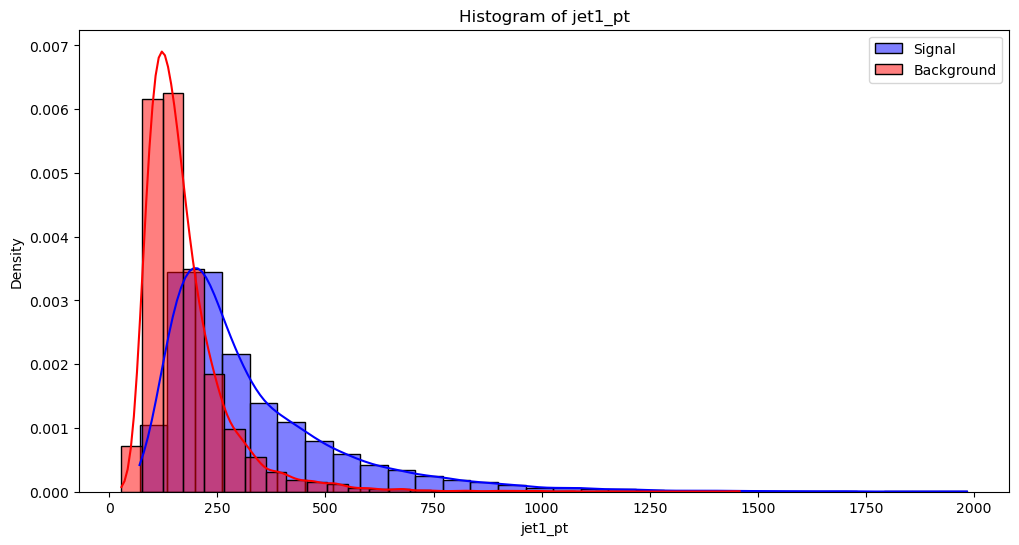

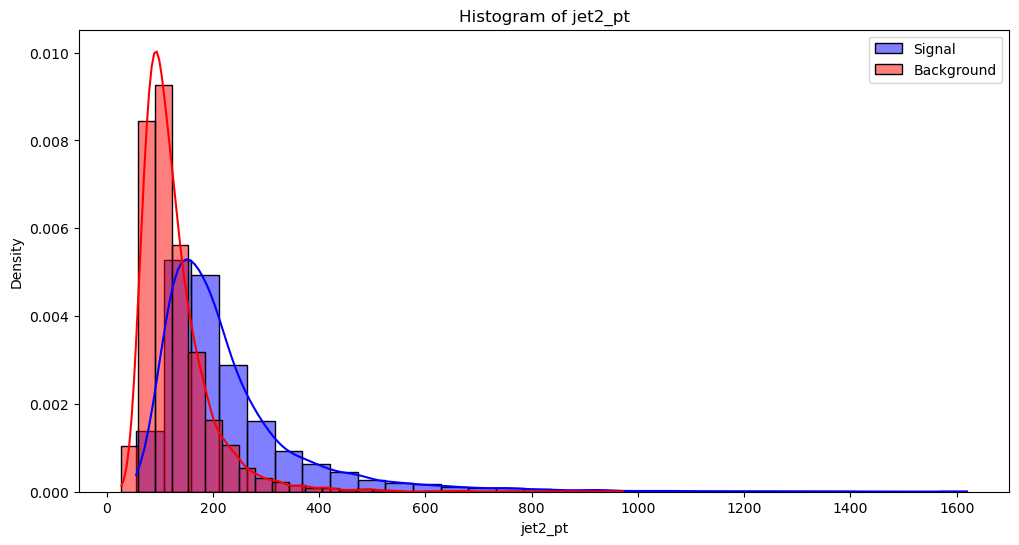

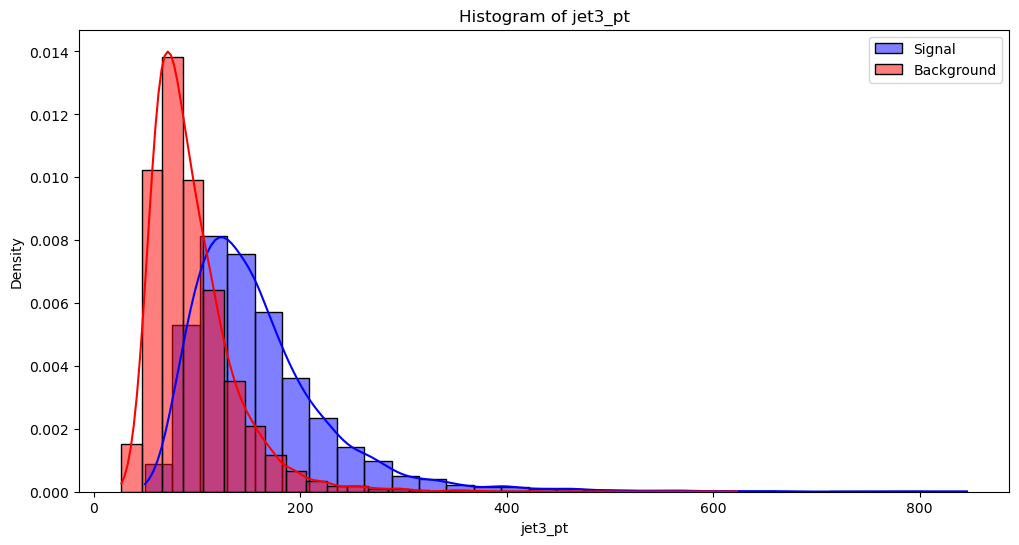

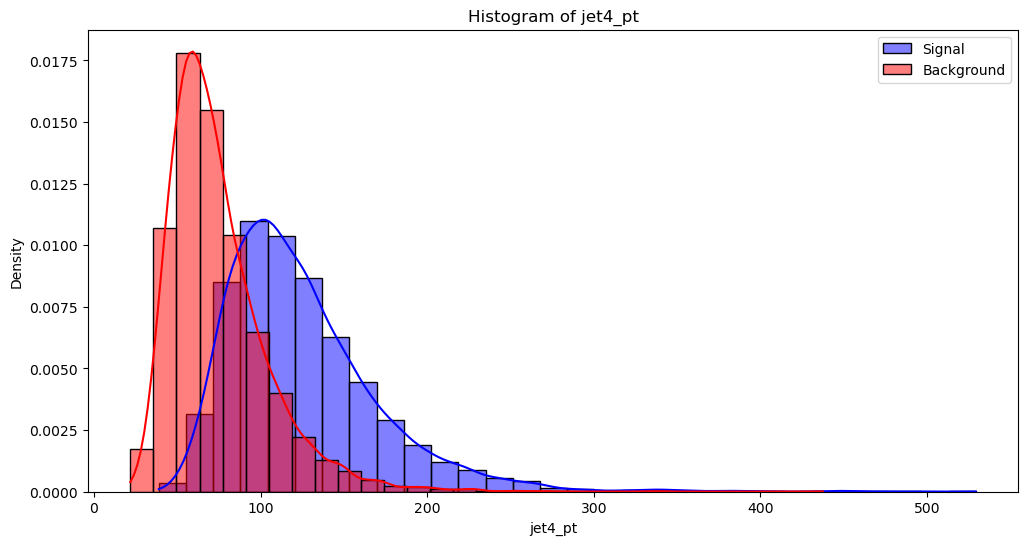

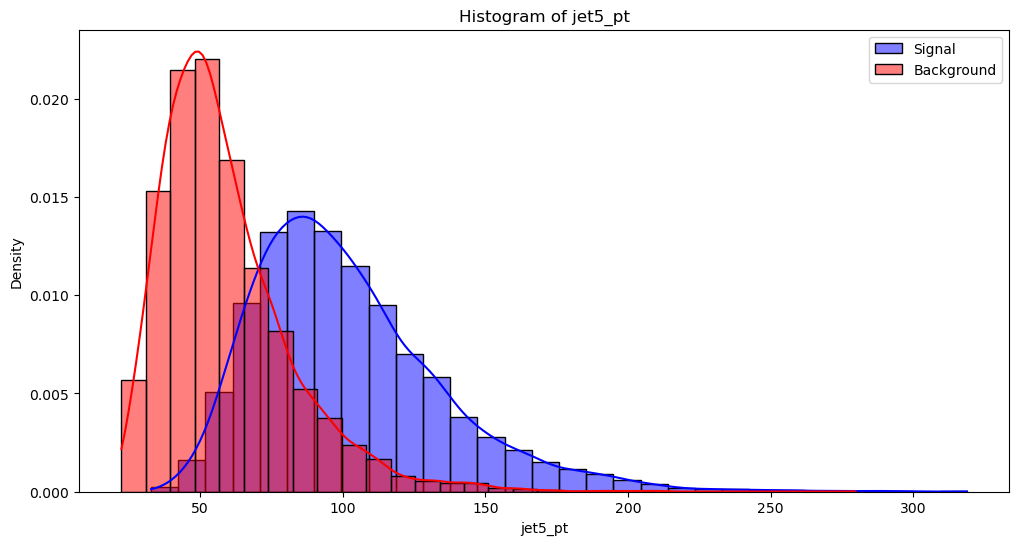

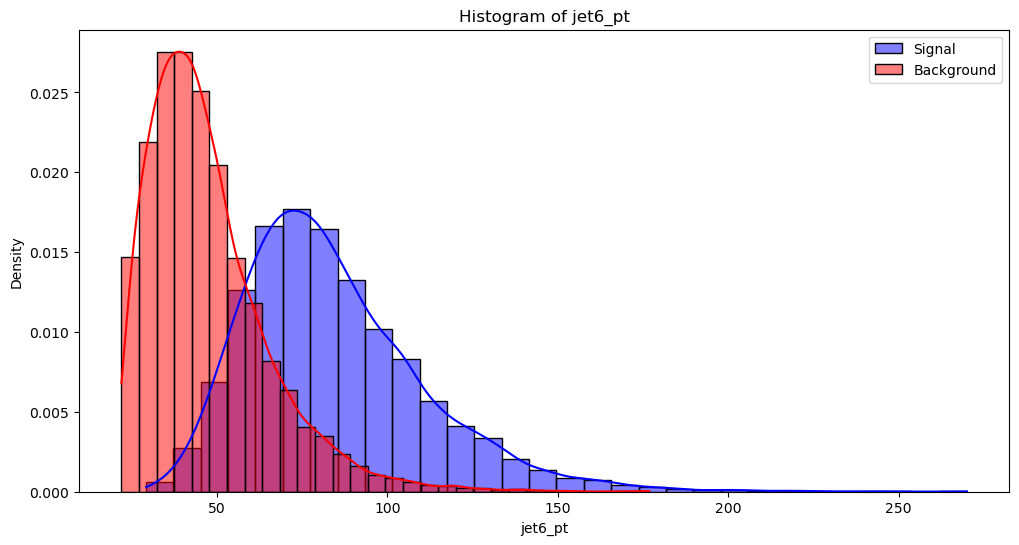

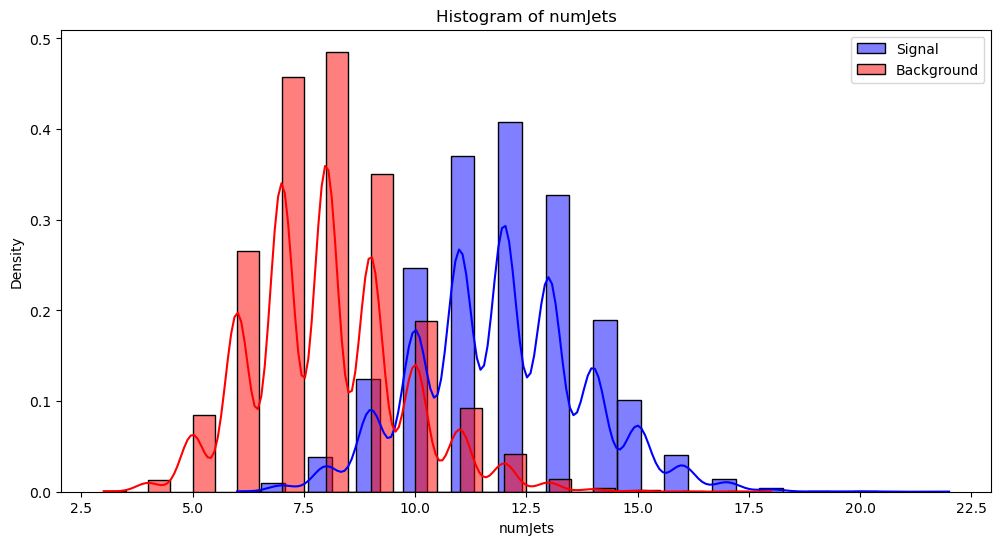

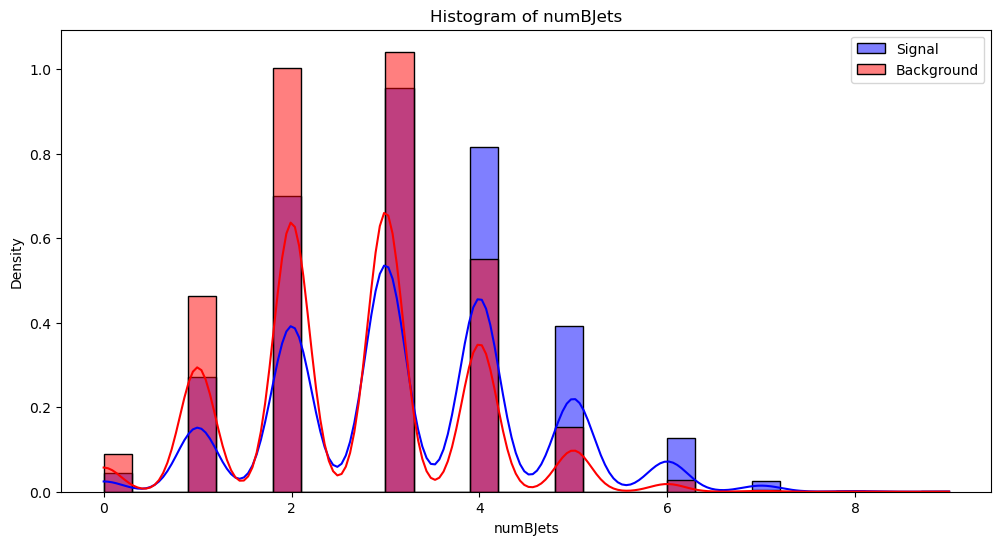

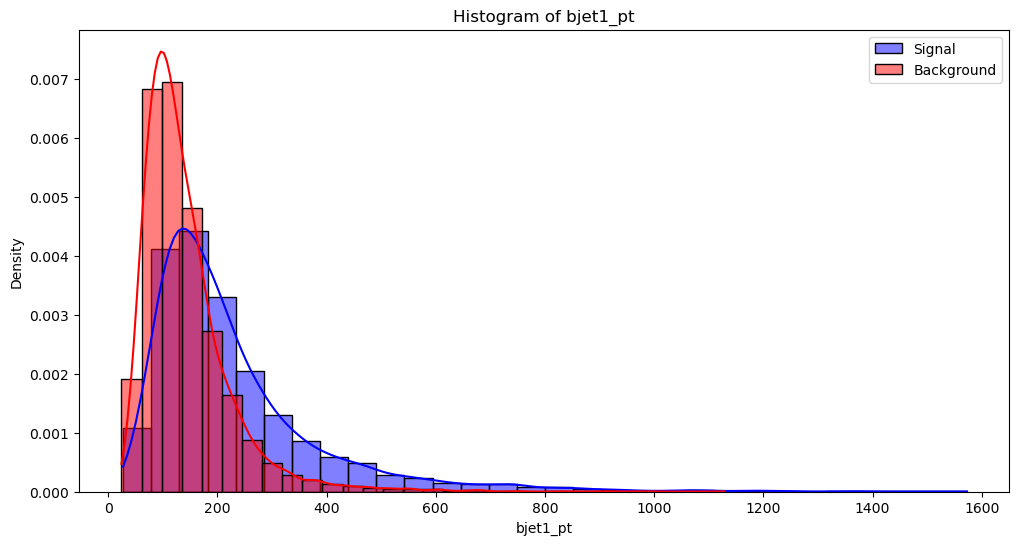

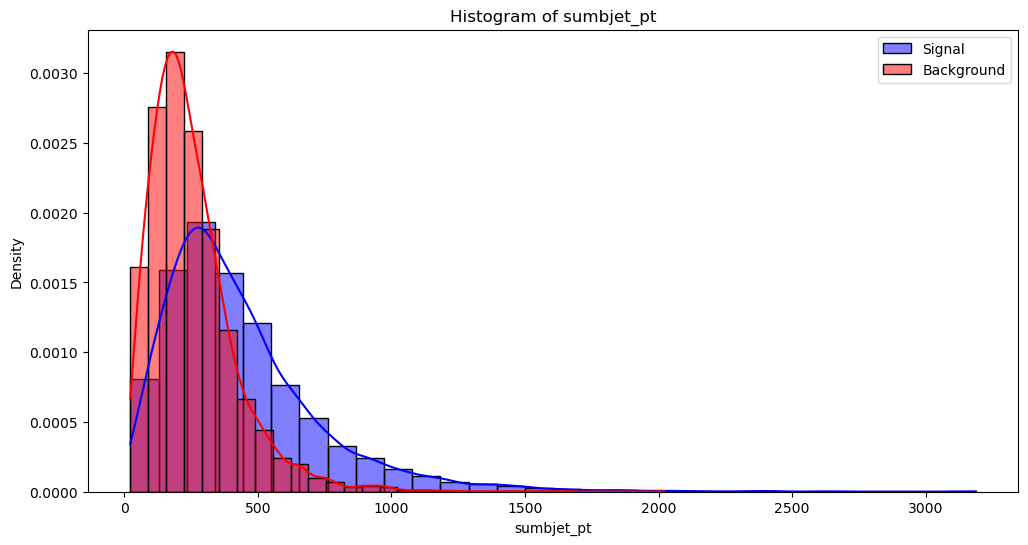

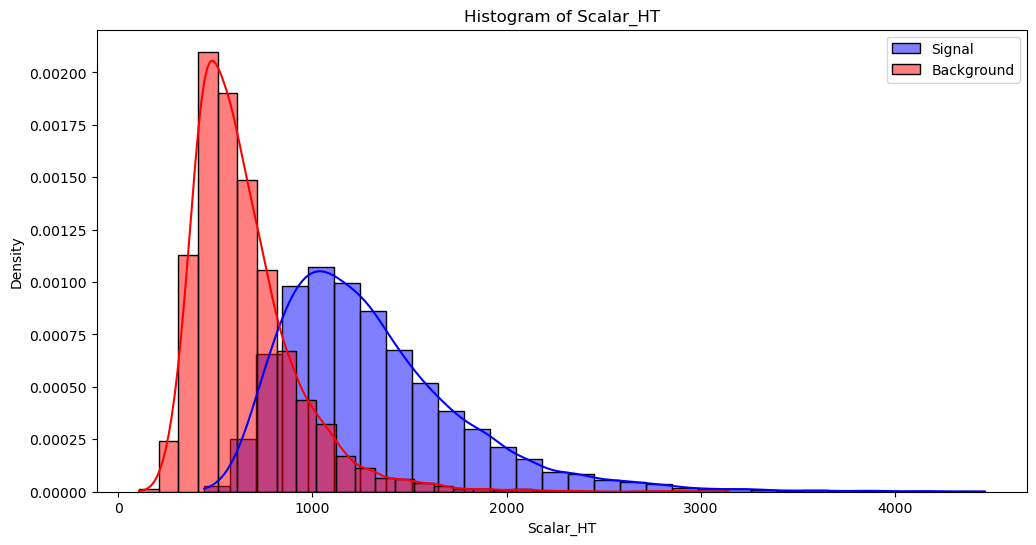

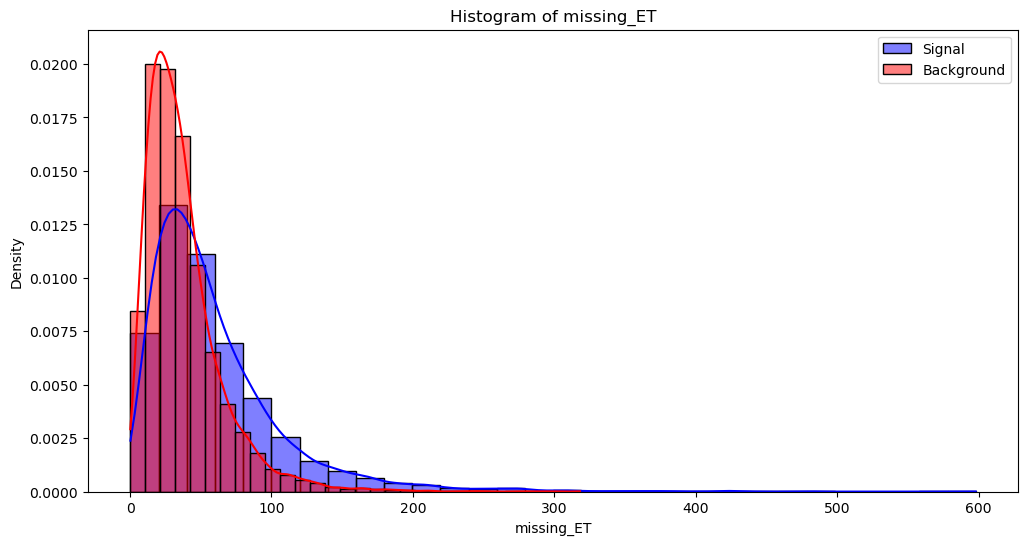

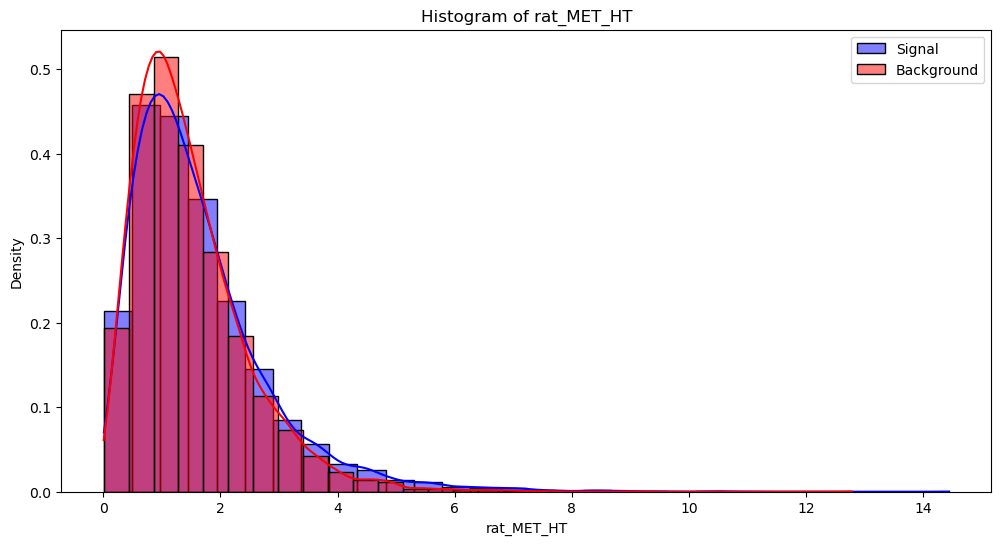

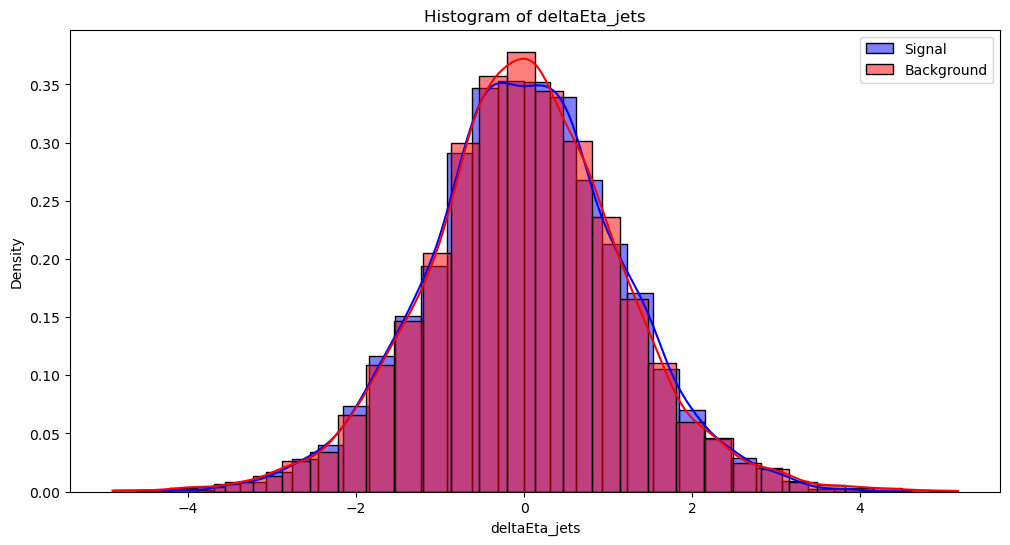

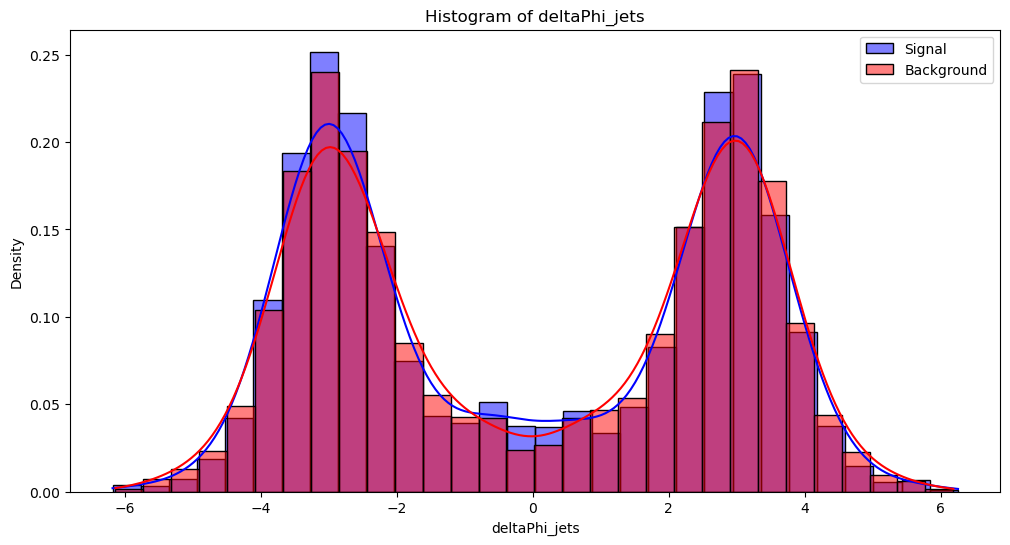

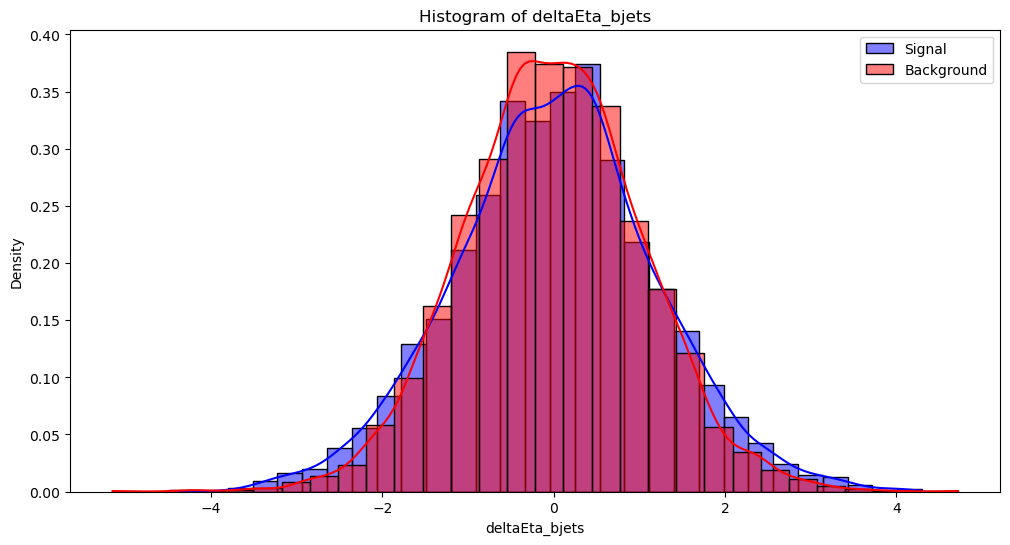

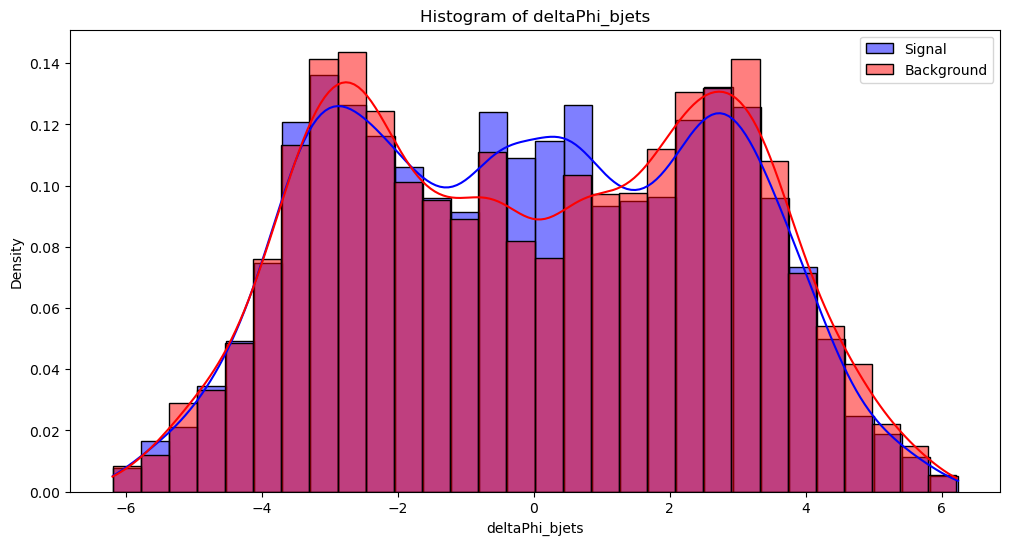

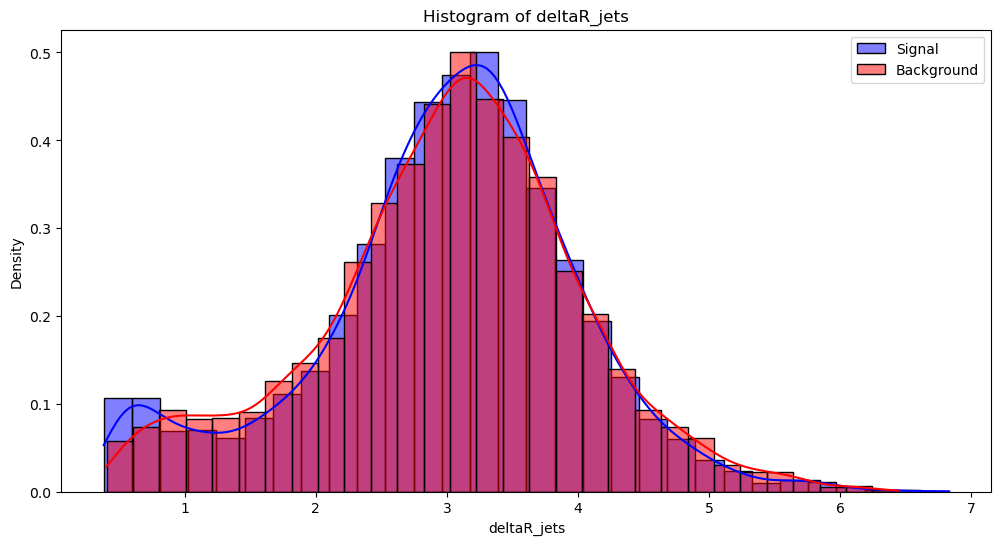

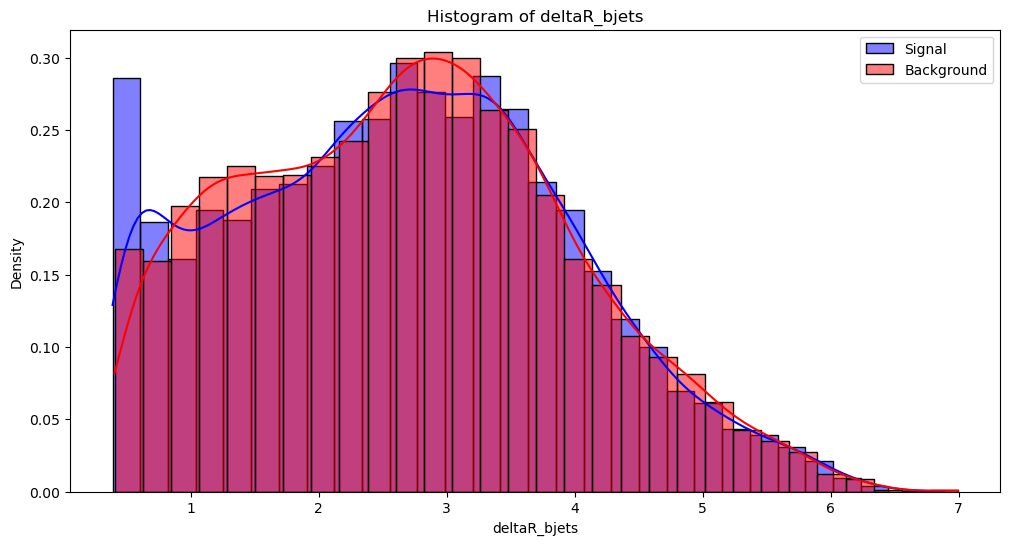

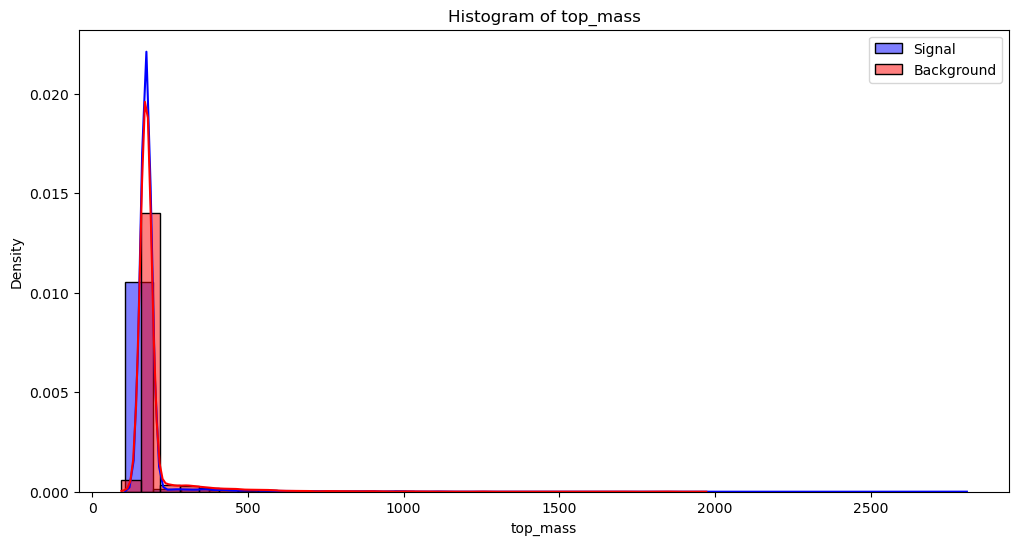

          Variable  Mean (Signal)  Mean (Background)  Std Dev (Signal)  \
0          jet1_pt     327.913806         174.845906        210.909642   
1          jet2_pt     227.726548         128.249269        138.746388   
2          jet3_pt     160.075479          95.247804         70.473132   
3          jet4_pt     124.816920          74.659800         45.335743   
4          jet5_pt     101.908855          58.960245         33.361184   
5          jet6_pt      84.300568          47.265088         26.556569   
6          numJets      11.907100           7.992100          1.867784   
7         numBJets       3.220000           2.628500          1.346618   
8         bjet1_pt     228.028349         141.447562        160.211425   
9       sumbjet_pt     431.375690         255.092182        293.190688   
10       Scalar_HT    1307.858939         648.850664        471.347441   
11      missing_ET      59.393203          37.499789         48.249683   
12      rat_MET_HT       1.635210     

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your datasets
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")


# Define the variables to analyze
variables = ['jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'jet5_pt', 'jet6_pt',
       'numJets', 'numBJets', 'bjet1_pt', 'sumbjet_pt', 'Scalar_HT',
       'missing_ET', 'rat_MET_HT', 'deltaEta_jets', 'deltaPhi_jets',
       'deltaEta_bjets', 'deltaPhi_bjets', 'deltaR_jets', 'deltaR_bjets',
       'top_mass']

# Initialize a list to collect statistics
summary_list = []

# Calculate statistics and create visualizations
for var in variables:
    signal_mean = signal_df[var].mean()
    background_mean = background_df[var].mean()
    signal_std = signal_df[var].std()
    background_std = background_df[var].std()
    
    # Append statistics to the summary list
    summary_list.append({
        "Variable": var,
        "Mean (Signal)": signal_mean,
        "Mean (Background)": background_mean,
        "Std Dev (Signal)": signal_std,
        "Std Dev (Background)": background_std,
        "Observations": ""
    })

    # Visualizations
    plt.figure(figsize=(12, 6))
    sns.histplot(signal_df[var], bins=30, color='blue', label='Signal', kde=True, stat='density')
    sns.histplot(background_df[var], bins=30, color='red', label='Background', kde=True, stat='density')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(f"{var}_histogram.png")  # Save histogram
    plt.show()

# Create a summary DataFrame from the list
summary = pd.DataFrame(summary_list)

# Print the summary DataFrame
print(summary)

# Save the summary to a text file
with open("analysis_summary.txt", "w") as f:
    f.write("# Data Analysis Results\n\n")
    f.write("## Variables Analyzed\n")
    f.write(", ".join(variables) + "\n\n")
    f.write("## Key Statistics\n\n")
    f.write(summary.to_markdown(index=False))  # Save summary in markdown format
    f.write("\n\n## Insights from Visualizations\n")
    f.write("Refer to the saved histogram images for detailed insights.\n")
    f.write("\n\n## Conclusion\n")
    f.write("Please summarize your conclusions based on the analysis and observations.\n")


### Box Plot

In this section, we use box plots to visualize the distributions of selected variables for both the signal and background datasets. 
Box plots provide insights into the spread, central tendency, and presence of outliers for each variable. 
This comparison can help identify variables with significant differences between the signal and background, 
which may be useful for classification or feature selection.


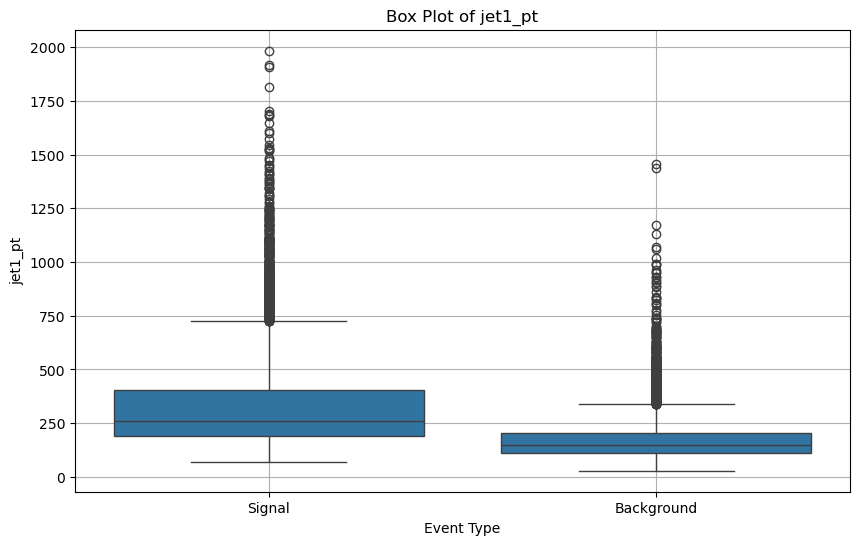

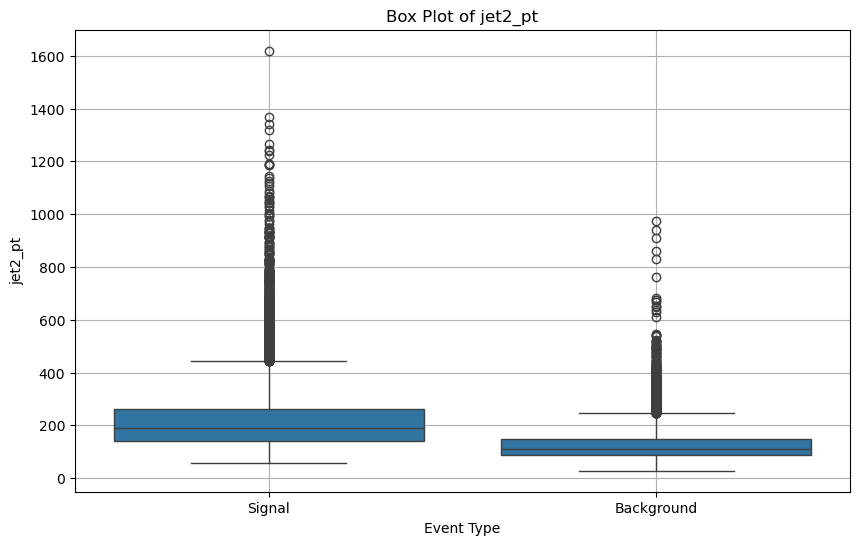

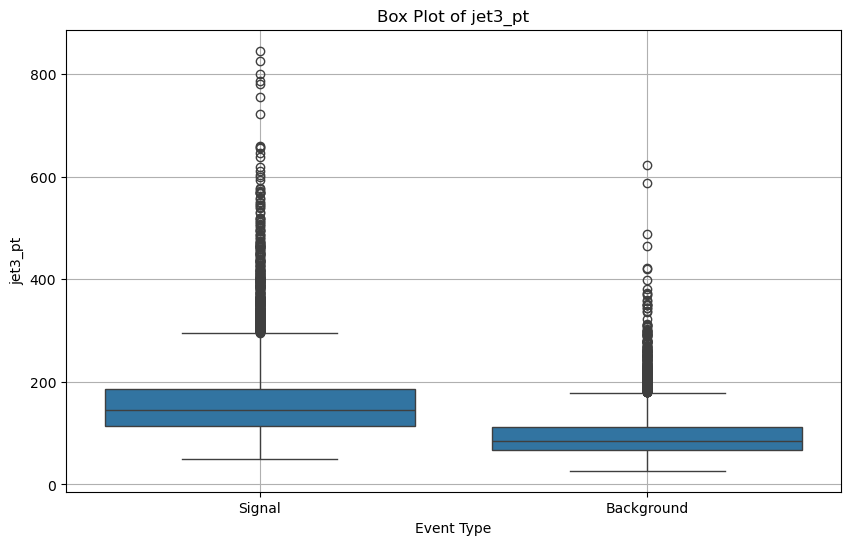

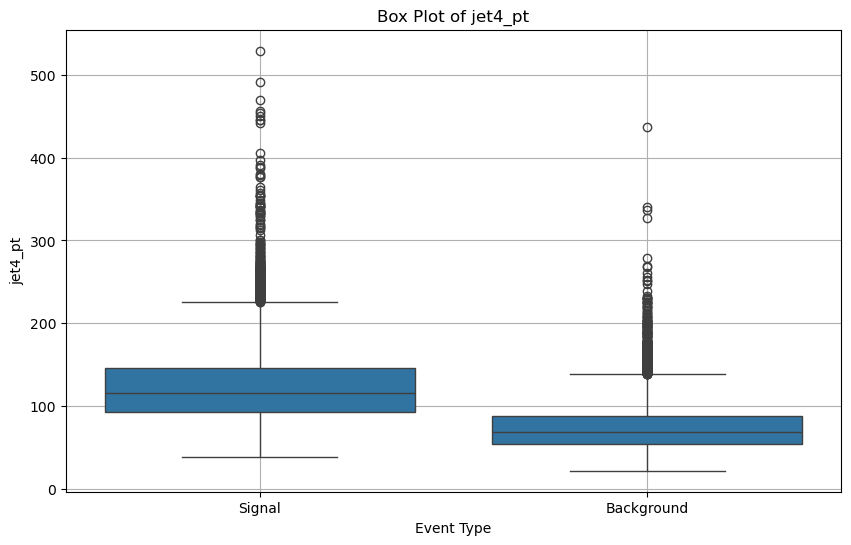

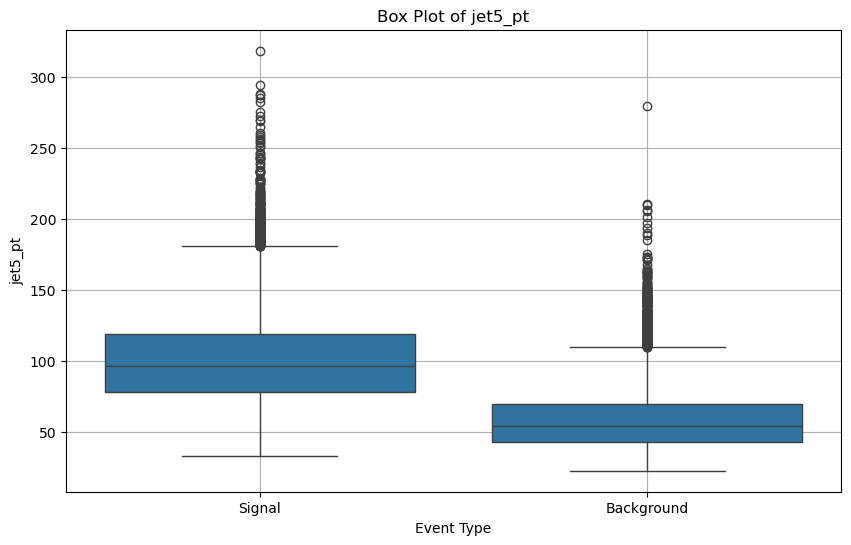

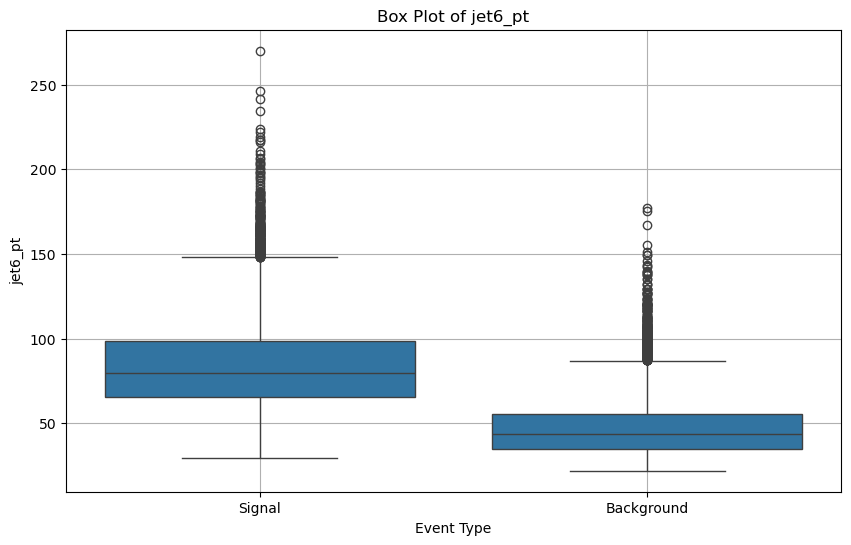

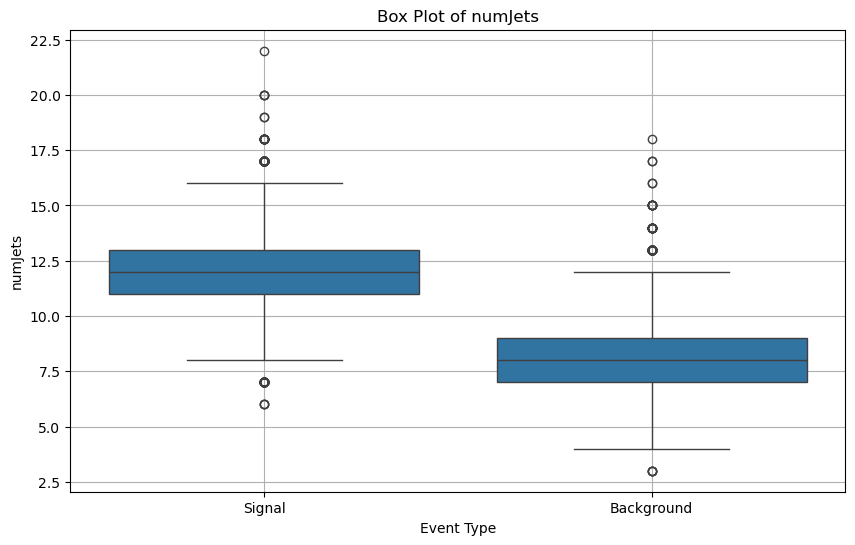

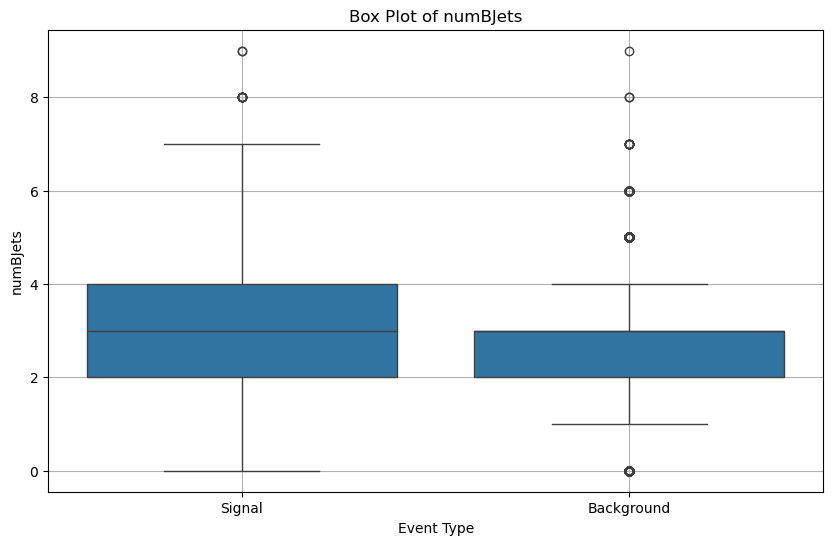

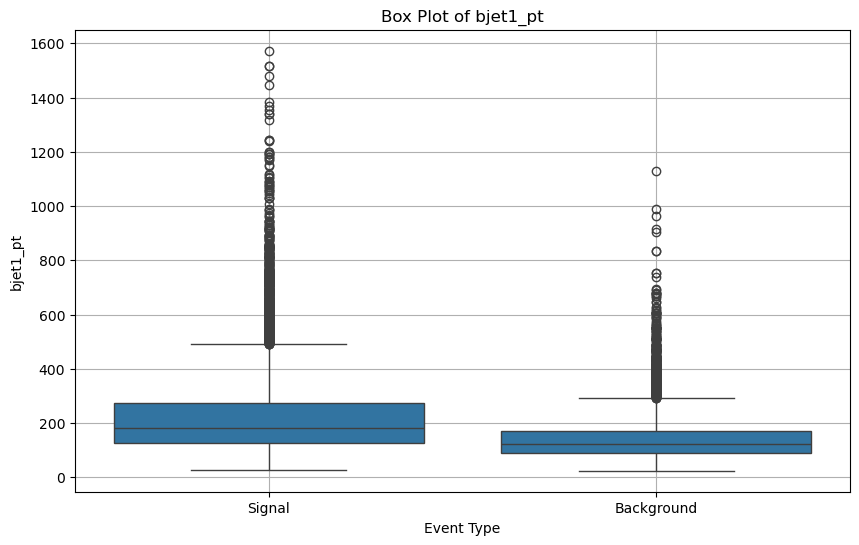

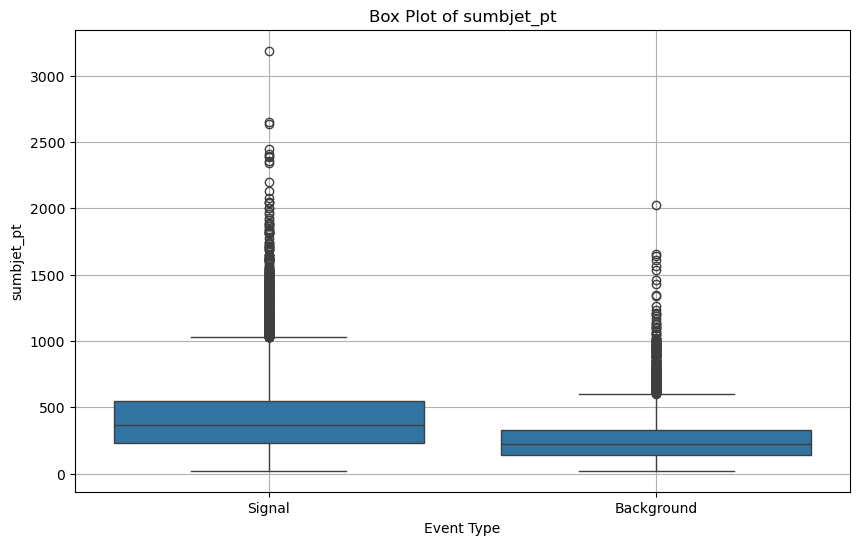

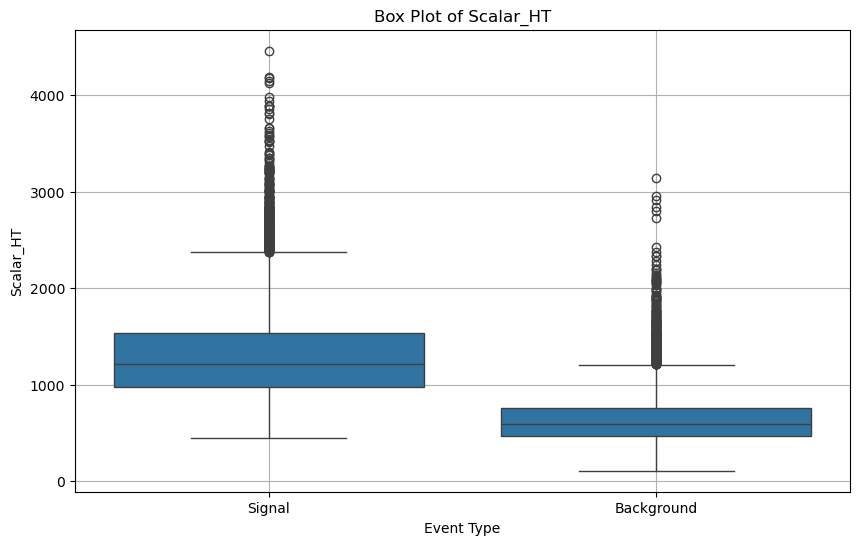

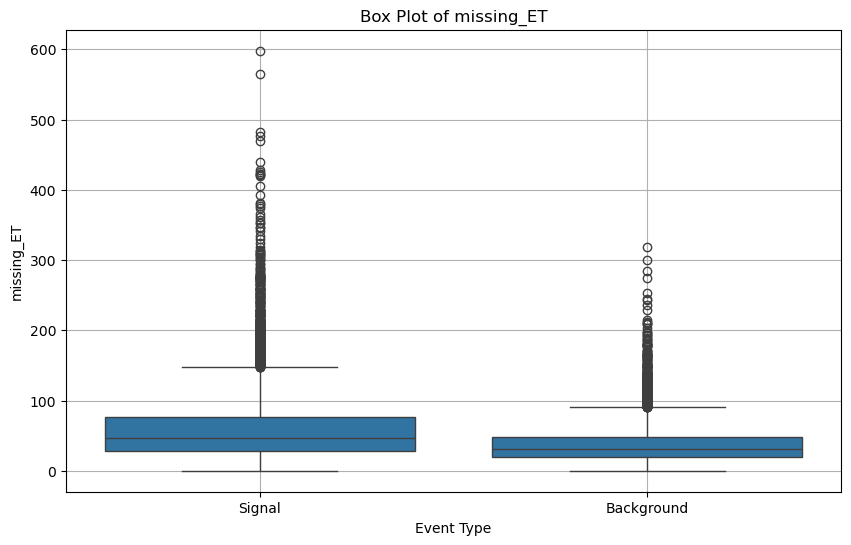

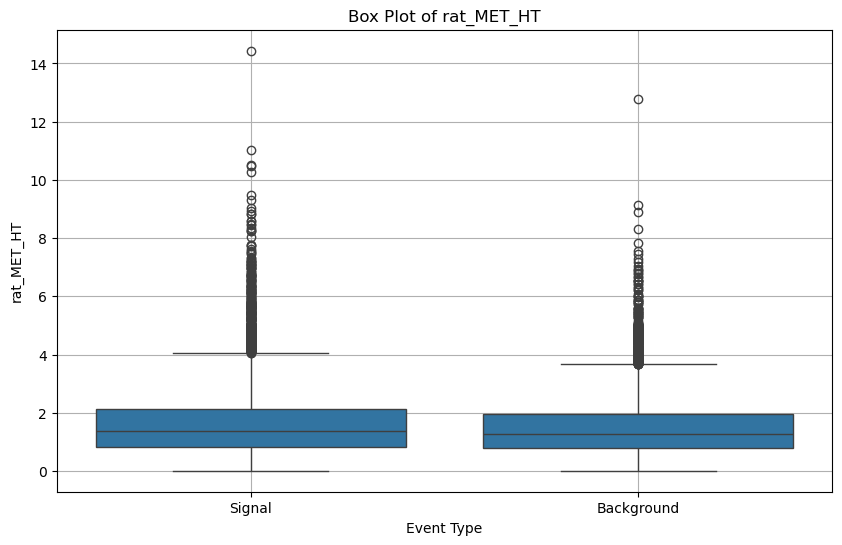

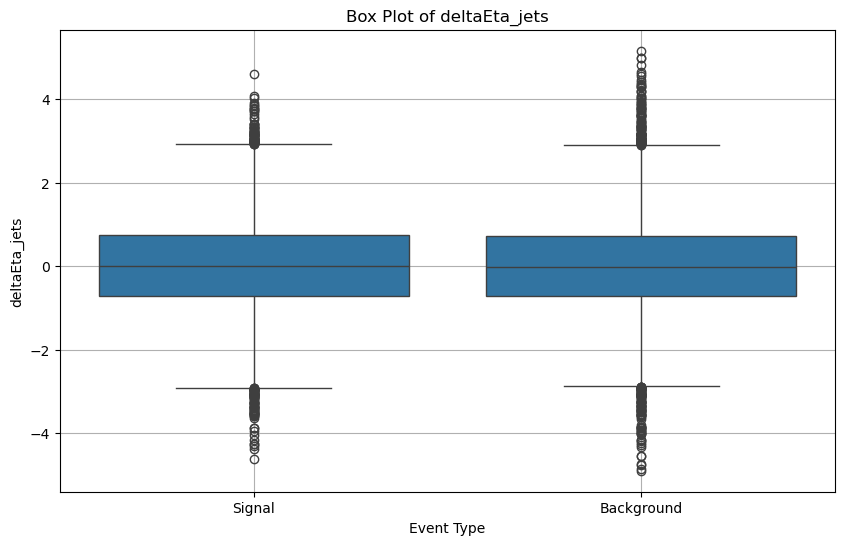

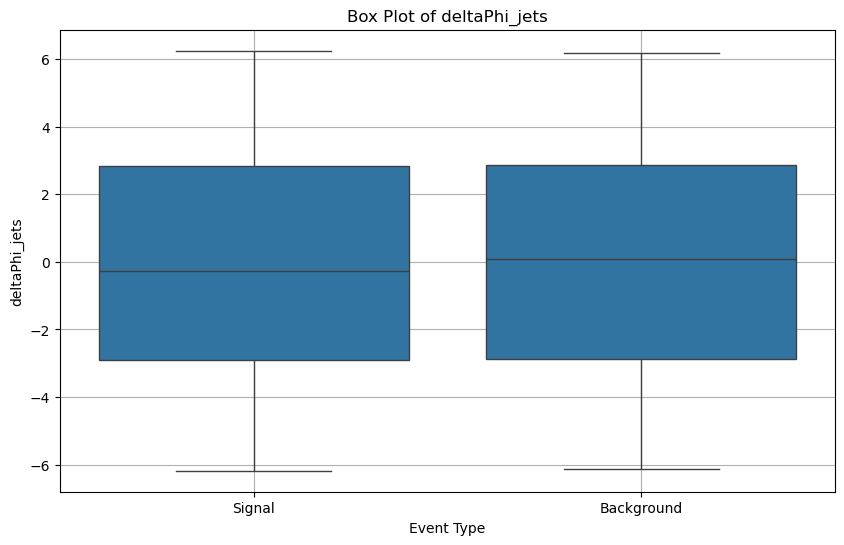

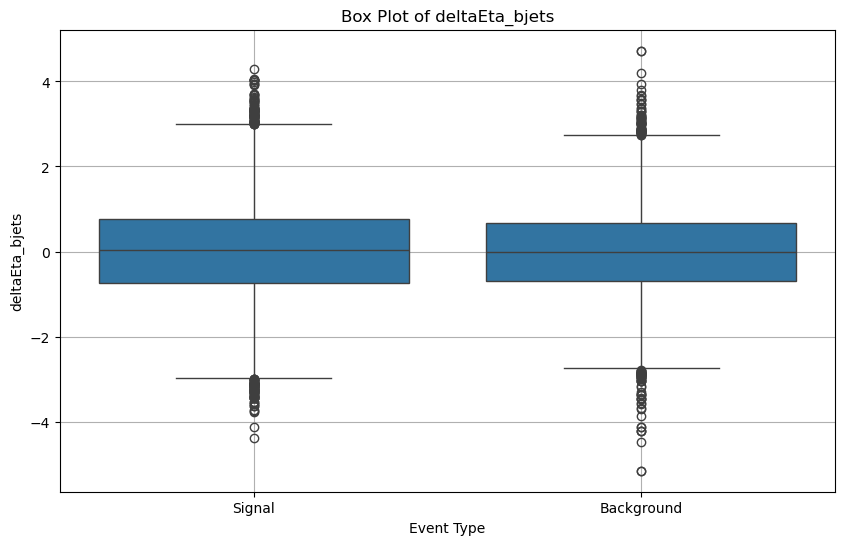

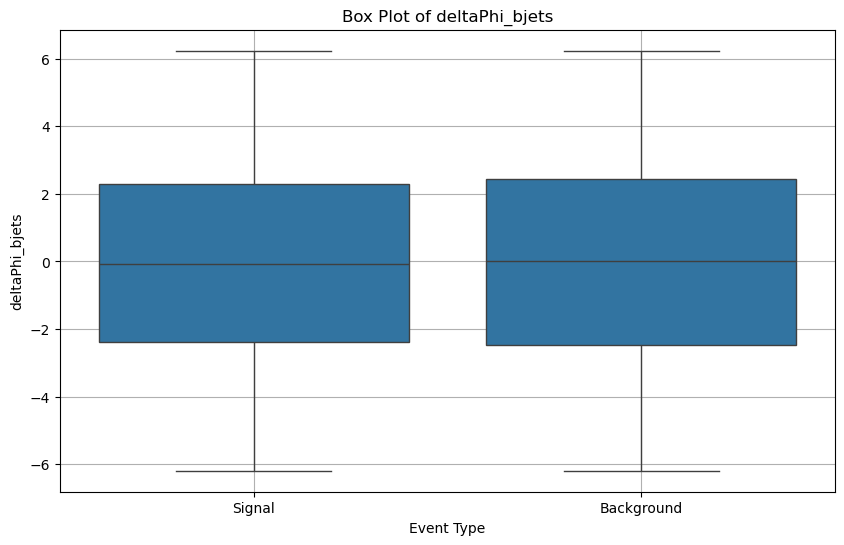

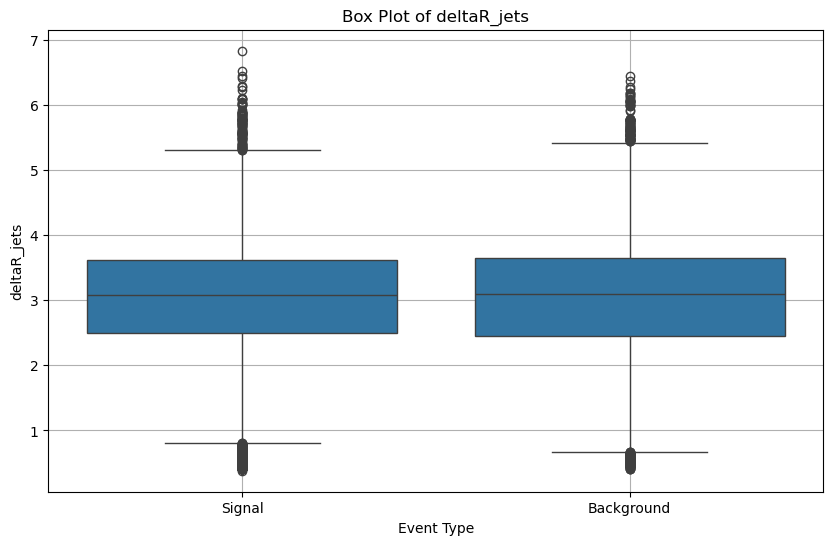

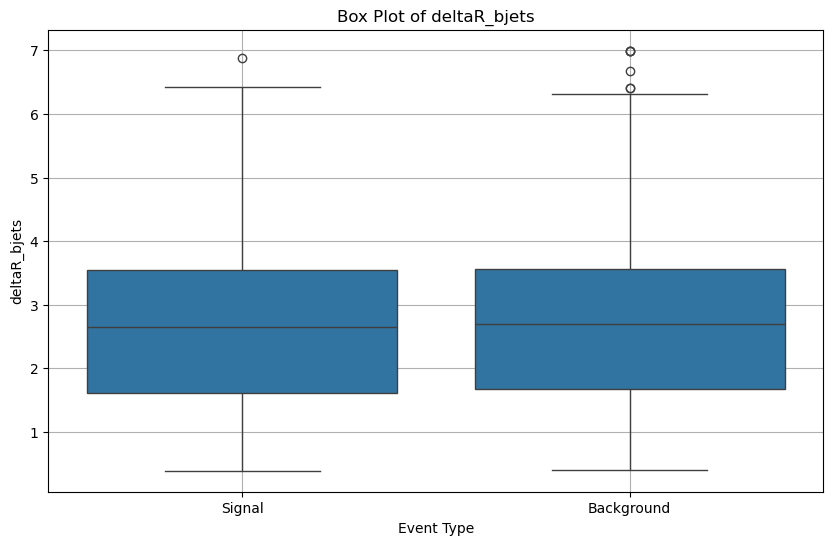

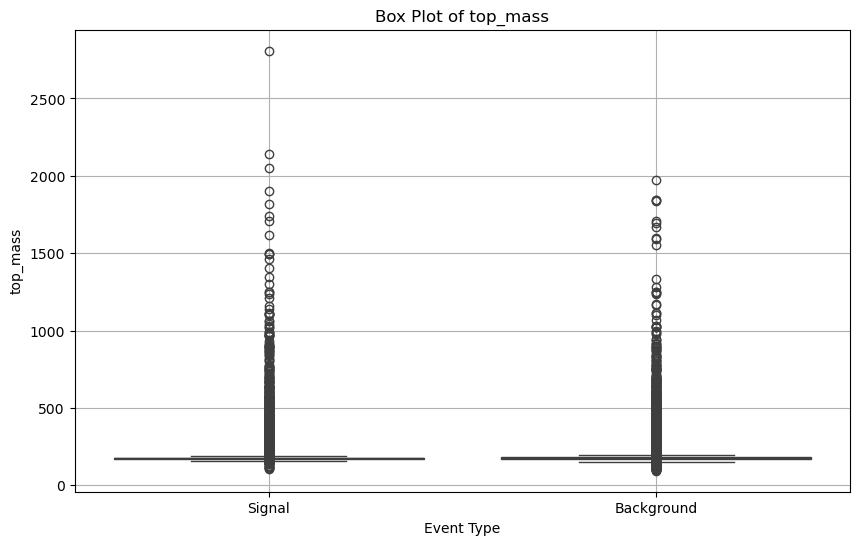

          Variable  Signal Mean  Signal Std Dev  Background Mean  \
0          jet1_pt   327.913806      210.909642       174.845906   
1          jet2_pt   227.726548      138.746388       128.249269   
2          jet3_pt   160.075479       70.473132        95.247804   
3          jet4_pt   124.816920       45.335743        74.659800   
4          jet5_pt   101.908855       33.361184        58.960245   
5          jet6_pt    84.300568       26.556569        47.265088   
6          numJets    11.907100        1.867784         7.992100   
7         numBJets     3.220000        1.346618         2.628500   
8         bjet1_pt   228.028349      160.211425       141.447562   
9       sumbjet_pt   431.375690      293.190688       255.092182   
10       Scalar_HT  1307.858939      471.347441       648.850664   
11      missing_ET    59.393203       48.249683        37.499789   
12      rat_MET_HT     1.635210        1.181753         1.487517   
13   deltaEta_jets     0.001854        1.149845 

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")


# Combine the data into a single DataFrame for easier plotting
signal_df['Type'] = 'Signal'
background_df['Type'] = 'Background'
combined_df = pd.concat([signal_df, background_df], ignore_index=True)

# List of variables to analyze
variables = ['jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'jet5_pt', 'jet6_pt',
       'numJets', 'numBJets', 'bjet1_pt', 'sumbjet_pt', 'Scalar_HT',
       'missing_ET', 'rat_MET_HT', 'deltaEta_jets', 'deltaPhi_jets',
       'deltaEta_bjets', 'deltaPhi_bjets', 'deltaR_jets', 'deltaR_bjets',
       'top_mass']

# Create a box plot for each variable
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Type', y=var, data=combined_df)
    plt.title(f'Box Plot of {var}')
    plt.xlabel('Event Type')
    plt.ylabel(var)
    plt.grid()
    plt.savefig(f'boxplot_{var}.png')  # Save the plot as a PNG file
    plt.show()

# Summary statistics for each variable
summary_statistics = []

for var in variables:
    signal_stats = signal_df[var].describe()
    background_stats = background_df[var].describe()
    summary_statistics.append({
        'Variable': var,
        'Signal Mean': signal_stats['mean'],
        'Signal Std Dev': signal_stats['std'],
        'Background Mean': background_stats['mean'],
        'Background Std Dev': background_stats['std'],
        'Signal IQR': signal_stats['75%'] - signal_stats['25%'],
        'Background IQR': background_stats['75%'] - background_stats['25%']
    })

# Create a summary DataFrame
summary_df = pd.DataFrame(summary_statistics)

# Display the summary
print(summary_df)

# Optionally, save the summary to a CSV file
summary_df.to_csv('boxplot_summary_statistics.csv', index=False)


### Density Plot

In this section, we visualize the distributions of selected variables for both the signal and background datasets using density plots. 
Density plots provide a smoothed representation of the distribution, allowing us to observe the underlying patterns and differences between the signal and background. 
This visualization is particularly useful for understanding the shapes of the distributions and identifying overlapping regions, 
which can inform classification tasks and feature selection.


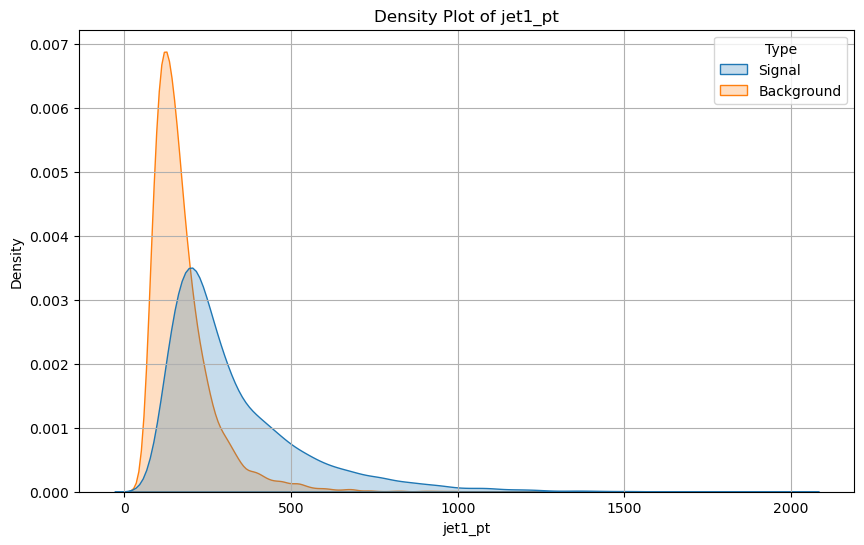

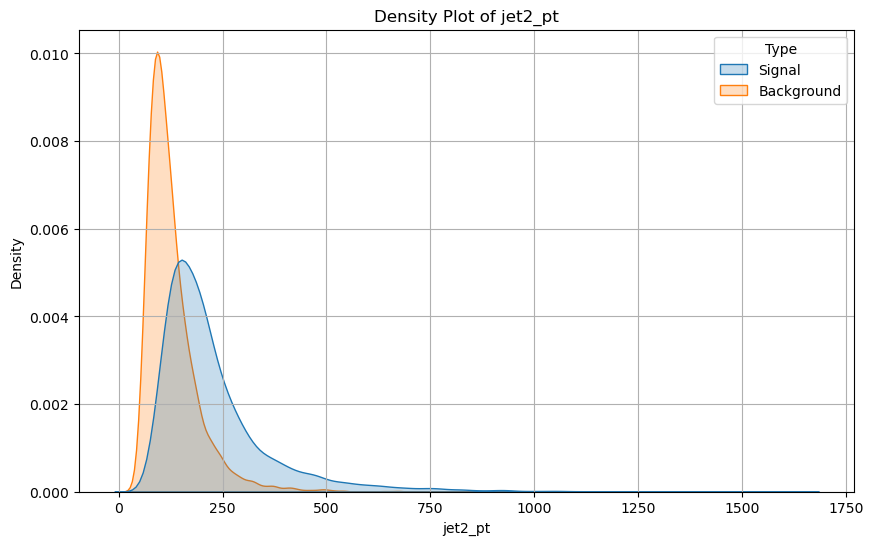

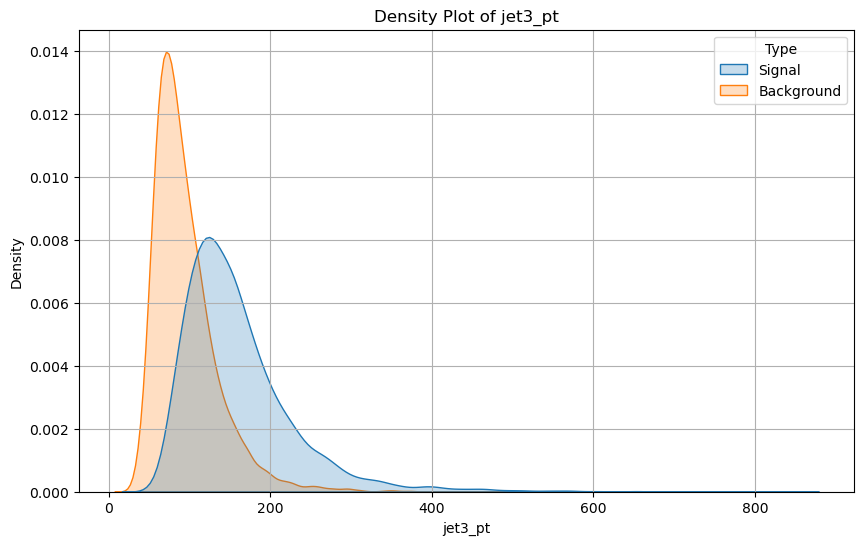

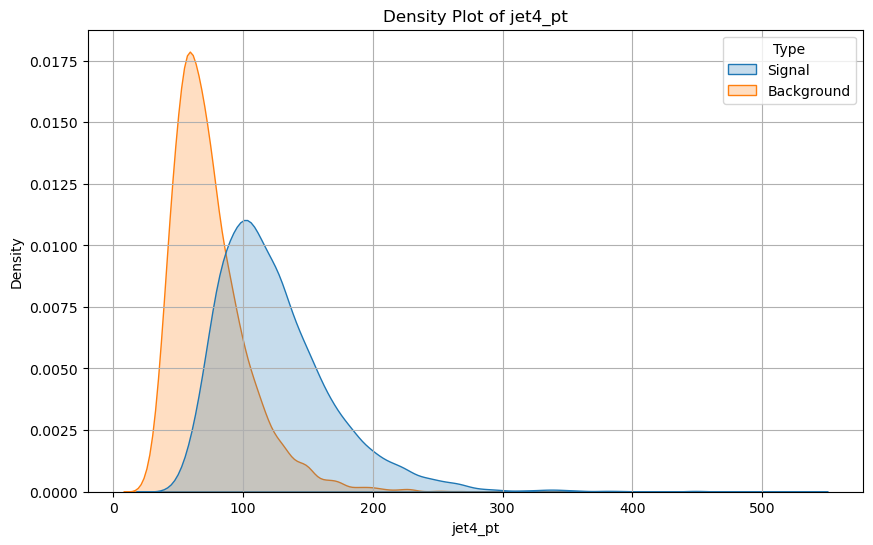

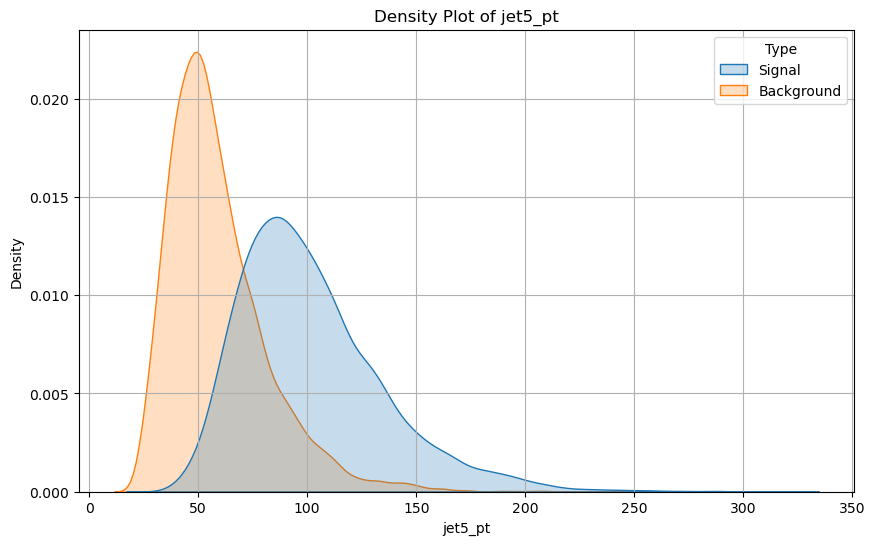

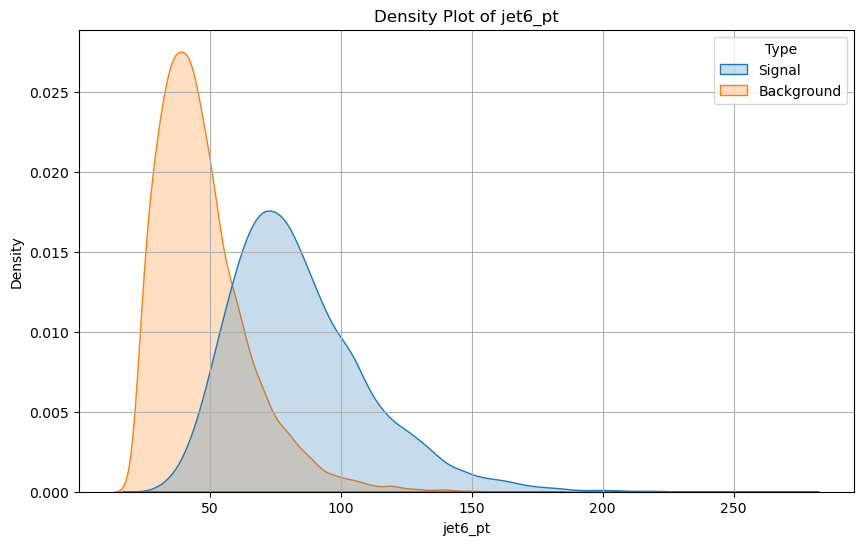

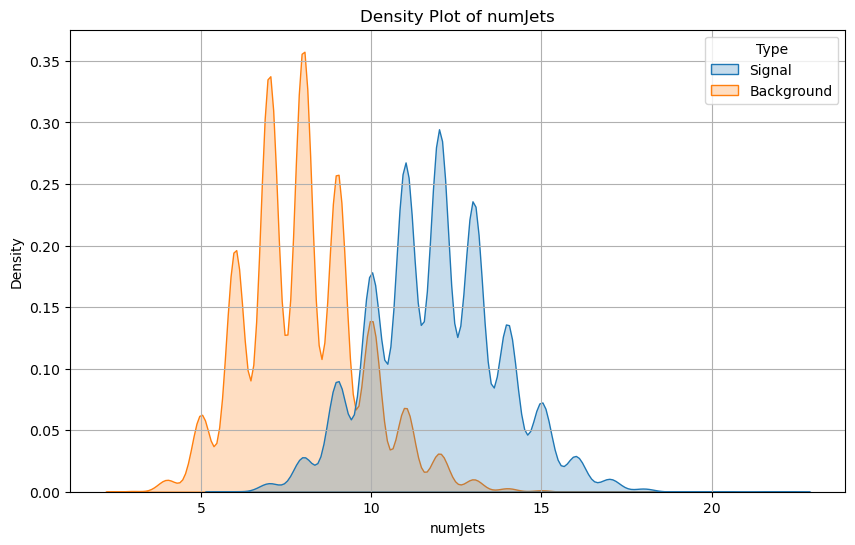

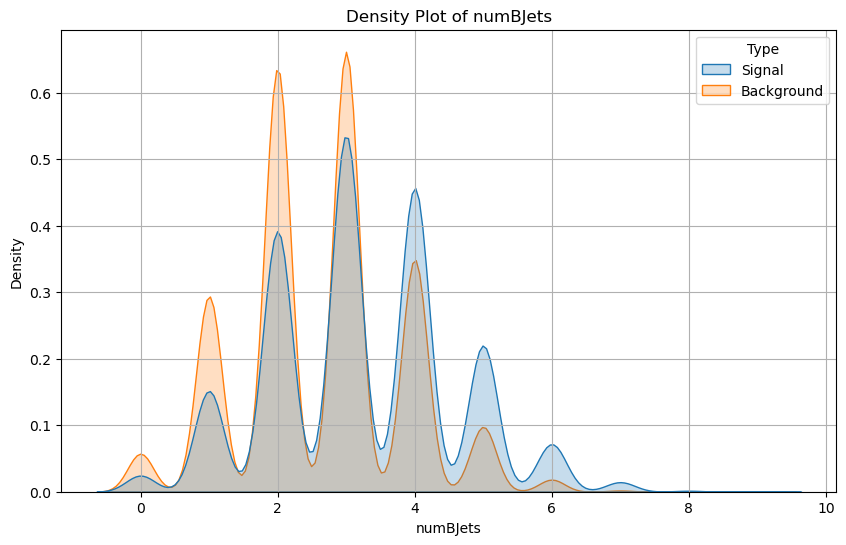

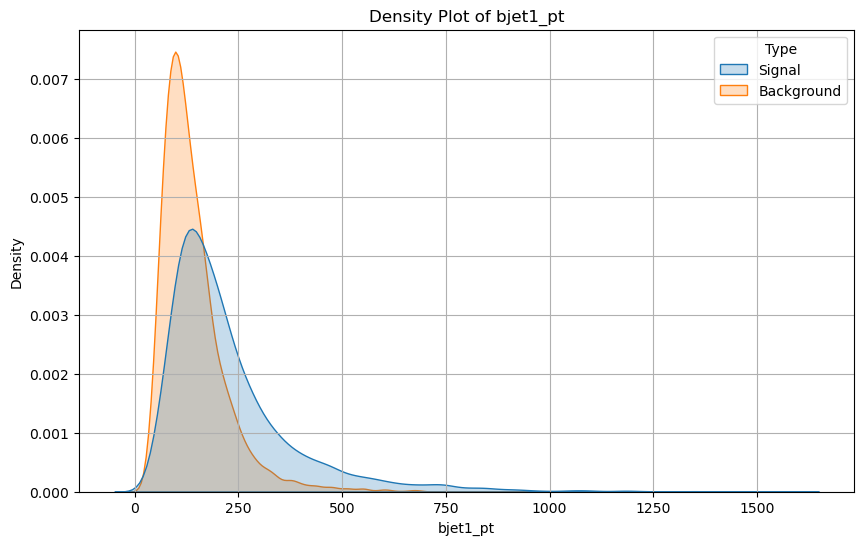

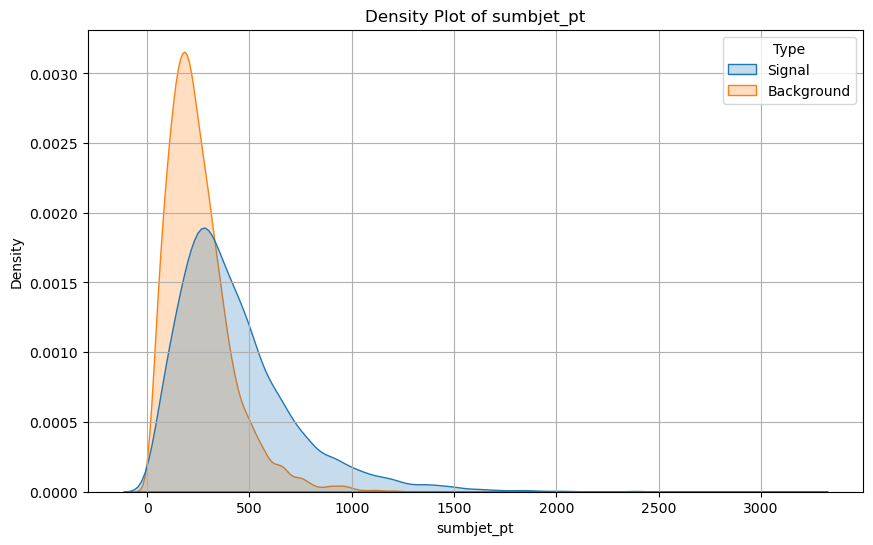

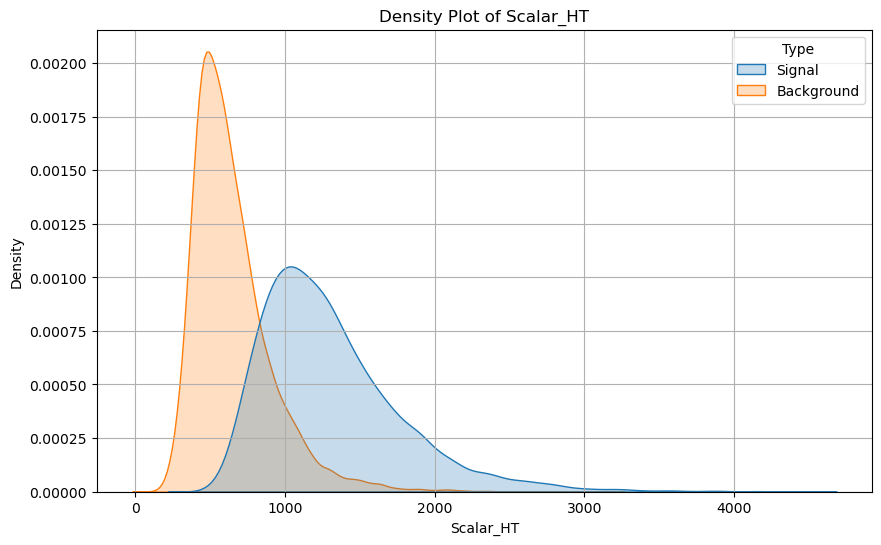

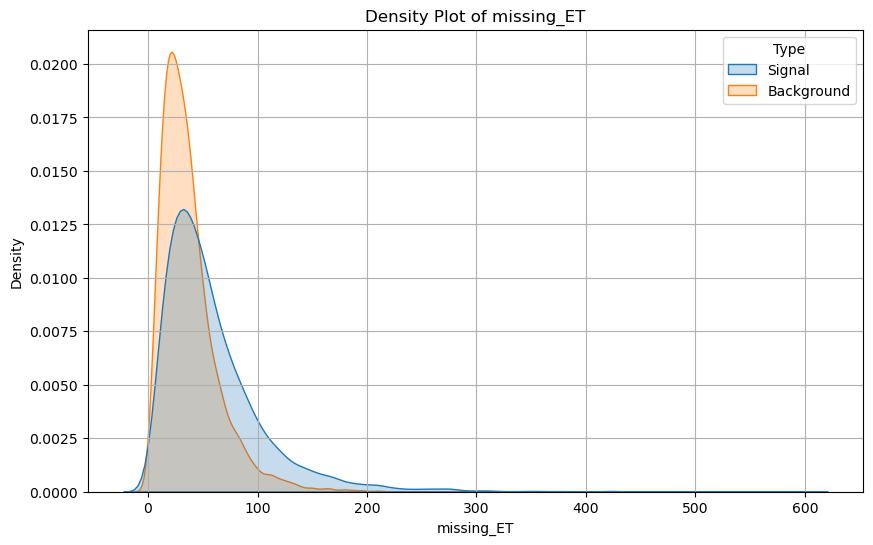

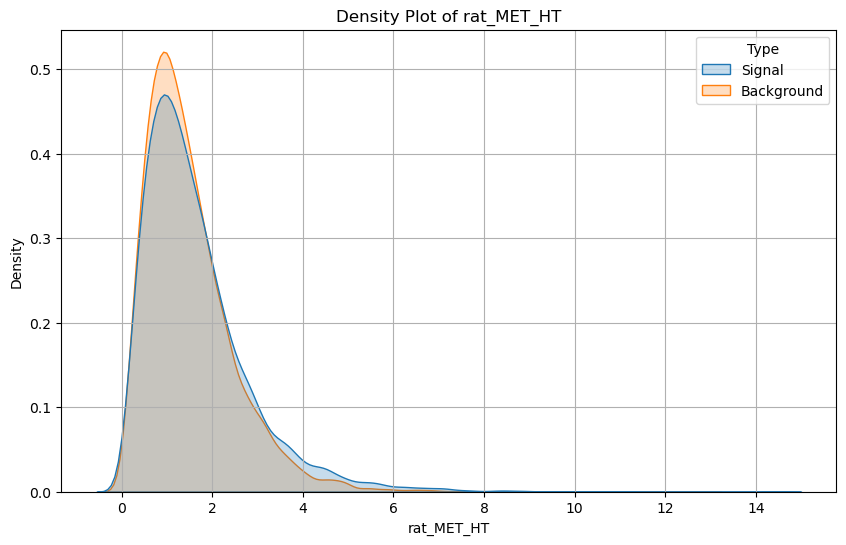

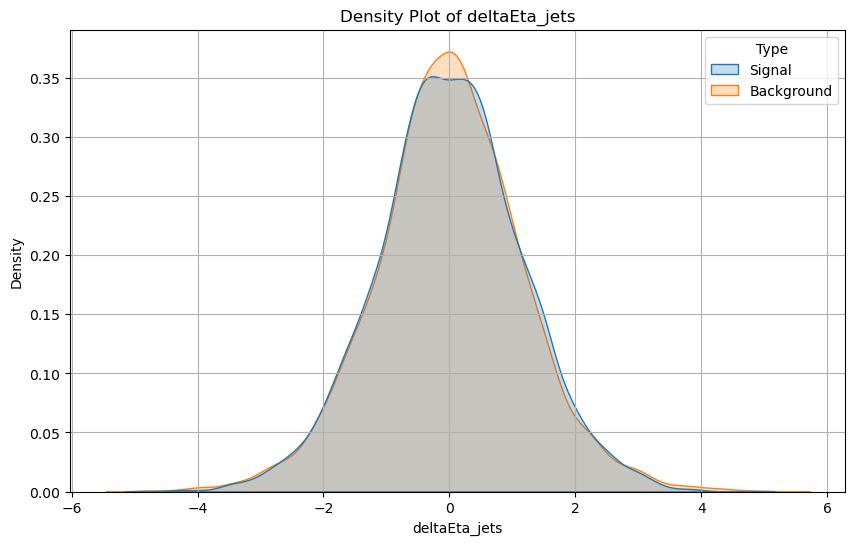

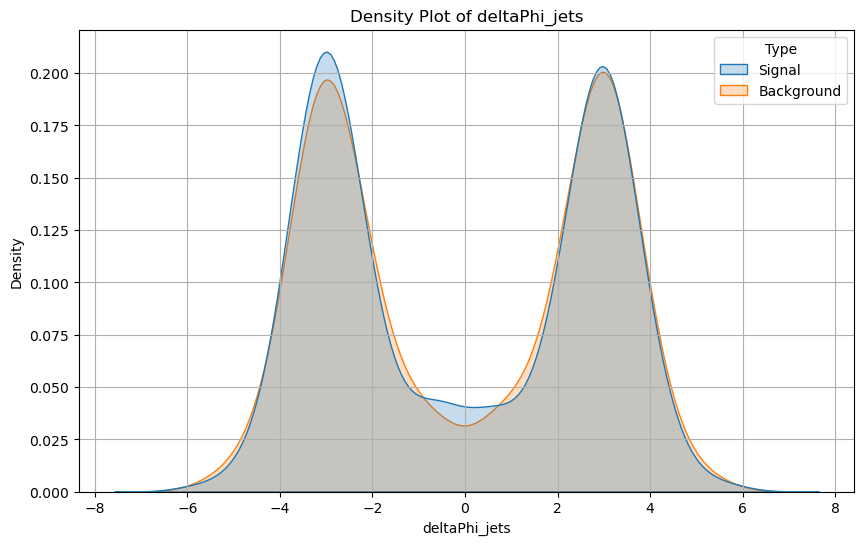

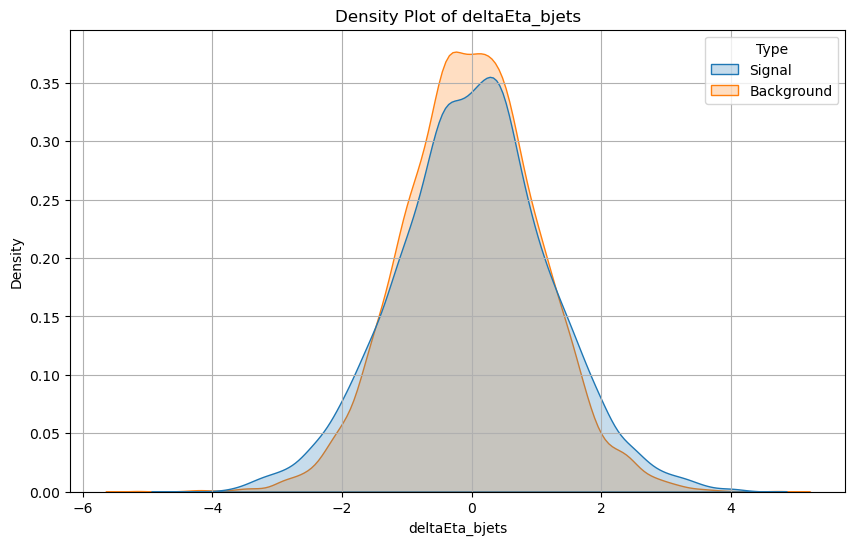

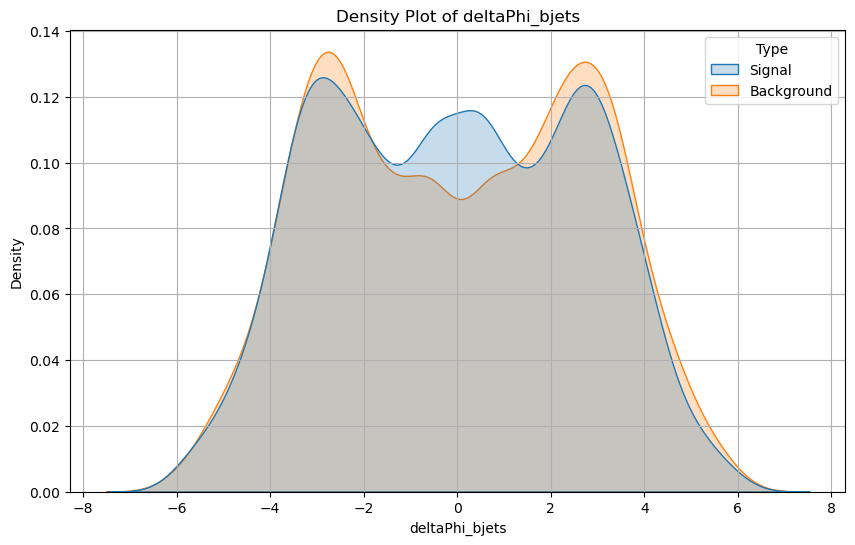

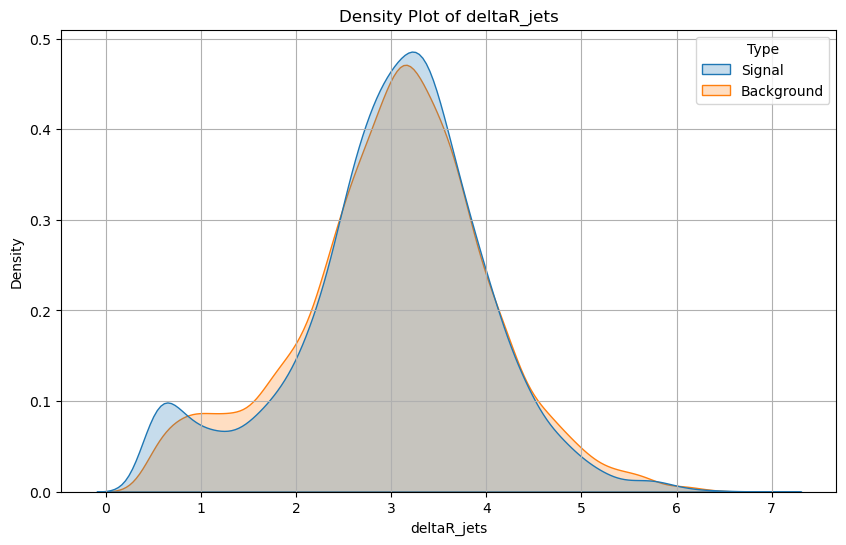

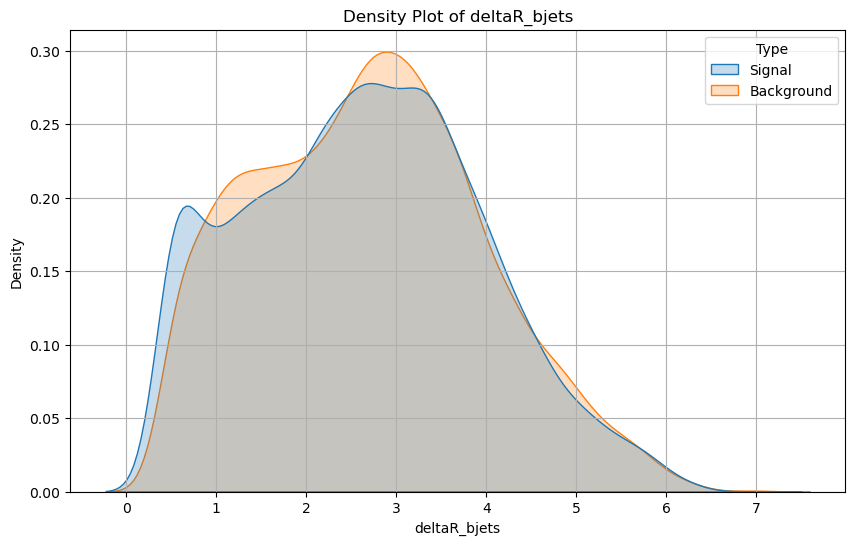

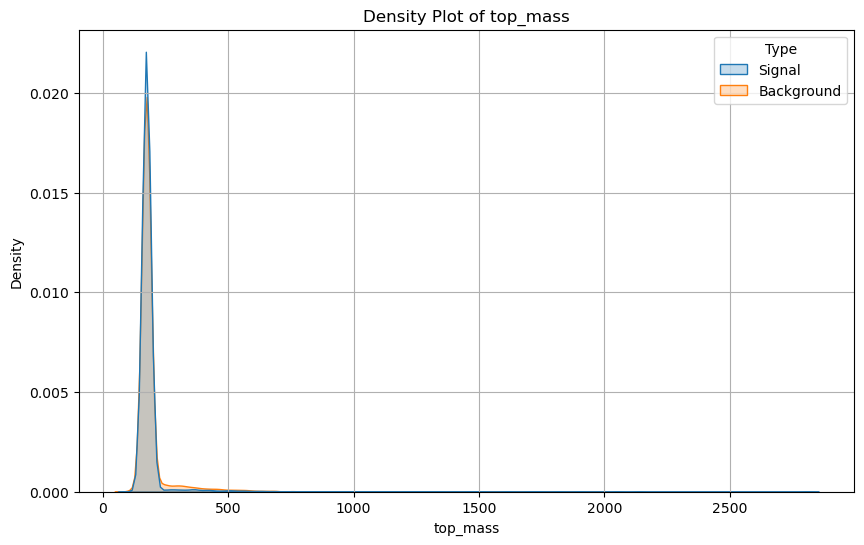

          Variable  Signal Mean  Signal Std Dev  Background Mean  \
0          jet1_pt   327.913806      210.909642       174.845906   
1          jet2_pt   227.726548      138.746388       128.249269   
2          jet3_pt   160.075479       70.473132        95.247804   
3          jet4_pt   124.816920       45.335743        74.659800   
4          jet5_pt   101.908855       33.361184        58.960245   
5          jet6_pt    84.300568       26.556569        47.265088   
6          numJets    11.907100        1.867784         7.992100   
7         numBJets     3.220000        1.346618         2.628500   
8         bjet1_pt   228.028349      160.211425       141.447562   
9       sumbjet_pt   431.375690      293.190688       255.092182   
10       Scalar_HT  1307.858939      471.347441       648.850664   
11      missing_ET    59.393203       48.249683        37.499789   
12      rat_MET_HT     1.635210        1.181753         1.487517   
13   deltaEta_jets     0.001854        1.149845 

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")

# Combine the data into a single DataFrame for easier plotting
signal_df['Type'] = 'Signal'
background_df['Type'] = 'Background'
combined_df = pd.concat([signal_df, background_df], ignore_index=True)

# List of variables to analyze
variables = ['jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'jet5_pt', 'jet6_pt',
       'numJets', 'numBJets', 'bjet1_pt', 'sumbjet_pt', 'Scalar_HT',
       'missing_ET', 'rat_MET_HT', 'deltaEta_jets', 'deltaPhi_jets',
       'deltaEta_bjets', 'deltaPhi_bjets', 'deltaR_jets', 'deltaR_bjets',
       'top_mass']

# Create density plots for each variable
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=combined_df, x=var, hue='Type', fill=True, common_norm=False)
    plt.title(f'Density Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.grid()
    plt.savefig(f'density_plot_{var}.png')  # Save the plot as a PNG file
    plt.show()

# Summary statistics for each variable
summary_statistics = []

for var in variables:
    signal_stats = signal_df[var].describe()
    background_stats = background_df[var].describe()
    summary_statistics.append({
        'Variable': var,
        'Signal Mean': signal_stats['mean'],
        'Signal Std Dev': signal_stats['std'],
        'Background Mean': background_stats['mean'],
        'Background Std Dev': background_stats['std'],
        'Signal IQR': signal_stats['75%'] - signal_stats['25%'],
        'Background IQR': background_stats['75%'] - background_stats['25%']
    })

# Create a summary DataFrame
summary_df = pd.DataFrame(summary_statistics)

# Display the summary
print(summary_df)

# Optionally, save the summary to a CSV file
summary_df.to_csv('density_plot_summary_statistics.csv', index=False)


## Random Forest Classifier and Feature Selection


In this section, we will utilize the Random Forest Classifier to analyze our dataset. 
Random forests are a versatile machine learning method that can be used for both classification and regression tasks. 
We will also perform feature selection using mutual information, which helps in identifying the most significant features influencing the target variable.

First, we will import the necessary libraries and load our dataset. Then we will split the data into training and testing sets, 
train the Random Forest model, and evaluate its performance based on accuracy.


In [10]:
!pip install scikit-learn

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif


### Feature Selection


In this section, we will perform data analysis on our signal and background datasets by loading them from Excel files, labeling the events, and combining them into a single DataFrame. We will then split the data into features and target variables, followed by training a Random Forest Classifier to distinguish between signal and background events. Additionally, we will extract and display the feature importances to understand the significant factors influencing our model.


In [12]:
# Load the signal and background data
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")

# Label the events: 1 for signal, 0 for background
signal_df['Type'] = 1
background_df['Type'] = 0

# Combine the DataFrames
combined_df = pd.concat([signal_df, background_df], ignore_index=True)

# Define feature columns (all variables except 'Type')
features = combined_df.columns.drop('Type')
X = combined_df[features]
y = combined_df['Type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Calculate feature importances from the trained model
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({'Variable': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Calculate mutual information
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_df = pd.DataFrame({'Variable': features, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

print("\nMutual Information Scores:")
print(mi_scores_df)

Feature Importances:
          Variable  Importance
6          numJets    0.271223
10       Scalar_HT    0.165360
5          jet6_pt    0.136299
4          jet5_pt    0.068781
3          jet4_pt    0.059229
2          jet3_pt    0.045632
1          jet2_pt    0.038184
0          jet1_pt    0.030982
8         bjet1_pt    0.020165
19        top_mass    0.018640
9       sumbjet_pt    0.017928
13   deltaEta_jets    0.016792
15  deltaEta_bjets    0.015455
11      missing_ET    0.014953
16  deltaPhi_bjets    0.014777
14   deltaPhi_jets    0.014735
18    deltaR_bjets    0.014687
17     deltaR_jets    0.014576
12      rat_MET_HT    0.014153
7         numBJets    0.007450

Mutual Information Scores:
          Variable  MI Score
6          numJets  0.378236
10       Scalar_HT  0.355631
5          jet6_pt  0.303637
4          jet5_pt  0.271656
3          jet4_pt  0.232012
2          jet3_pt  0.202566
1          jet2_pt  0.170506
0          jet1_pt  0.155719
8         bjet1_pt  0.119127
9       su

/tmp/ipykernel_41574/3049891990.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Variable", data=importance_df, palette="viridis")
/tmp/ipykernel_41574/3049891990.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MI Score", y="Variable", data=mi_scores_df, palette="plasma")


Summary and analysis images saved successfully.


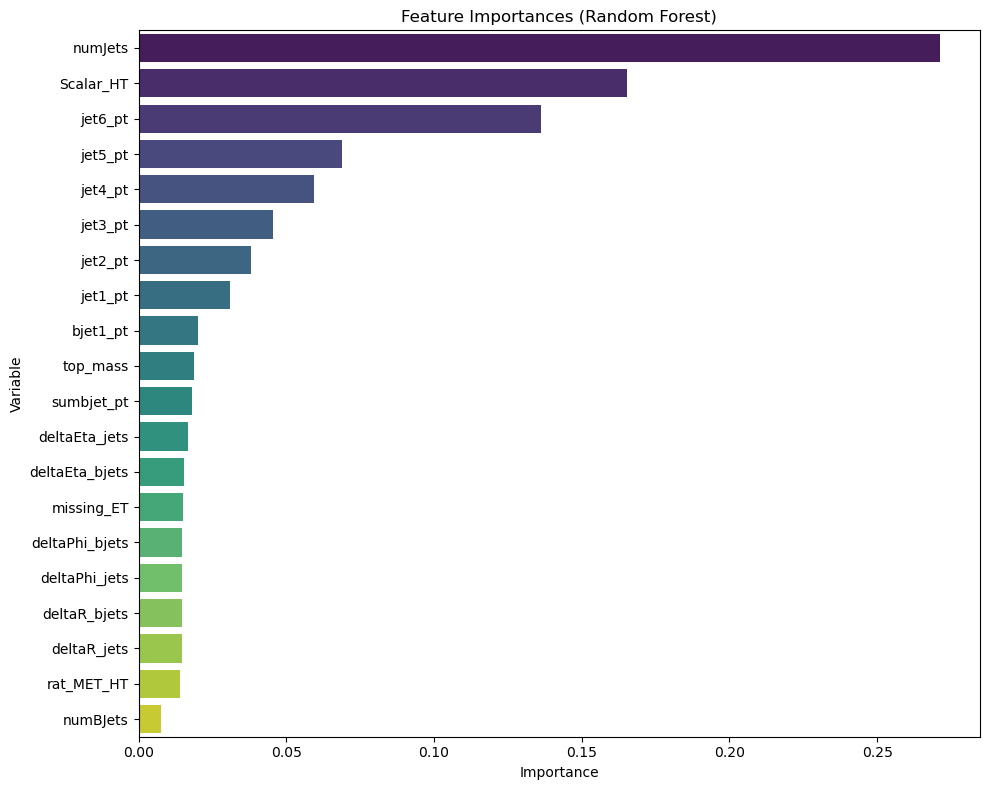

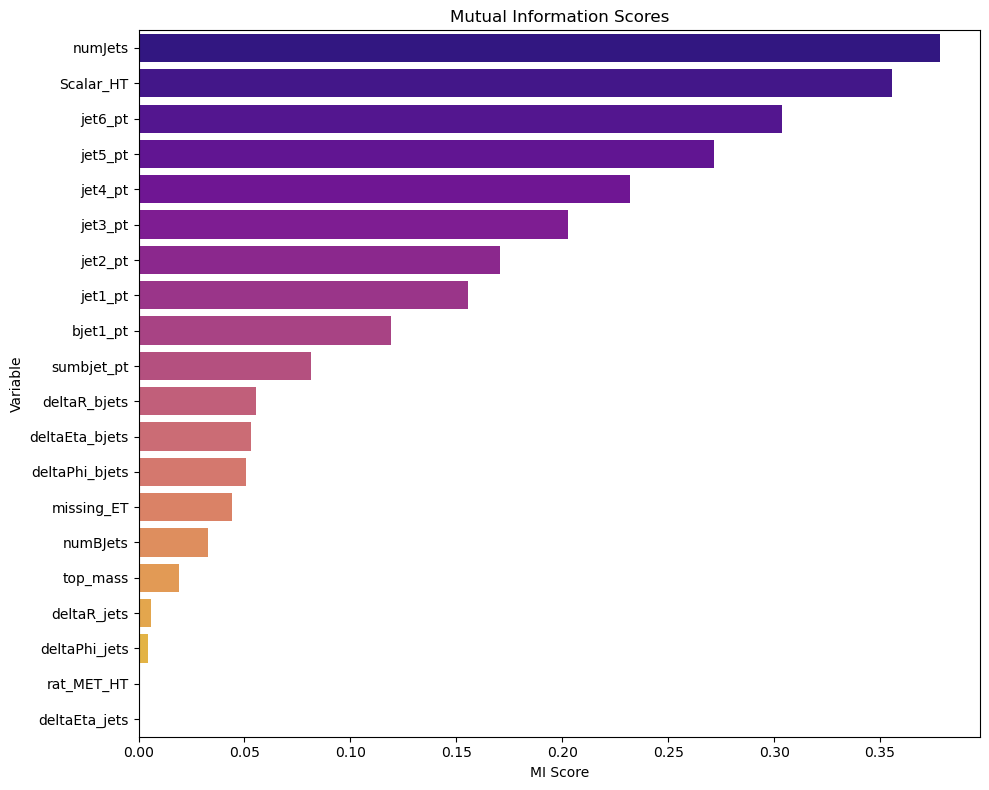

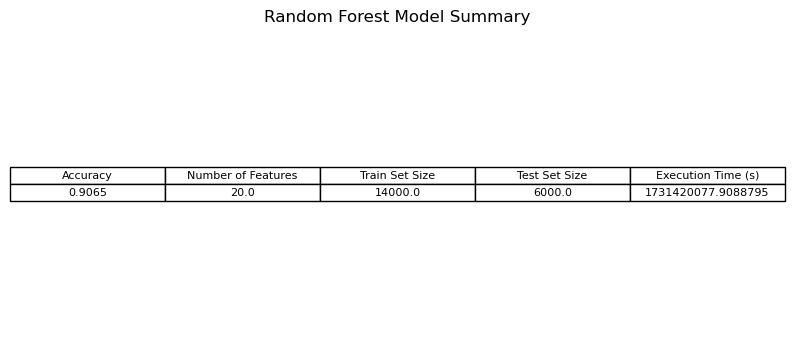

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# Label the events: 1 for signal, 0 for background
signal_df['Type'] = 1
background_df['Type'] = 0

# Combine the DataFrames
combined_df = pd.concat([signal_df, background_df], ignore_index=True)

# Define feature columns (all variables except 'Type')
features = combined_df.columns.drop('Type')
X = combined_df[features]
y = combined_df['Type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate model performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Feature importances
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({'Variable': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mutual information scores
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_df = pd.DataFrame({'Variable': features, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Creating a summary DataFrame
summary_data = {
    "Accuracy": [accuracy],
    "Number of Features": [len(features)],
    "Train Set Size": [len(X_train)],
    "Test Set Size": [len(X_test)],
    "Execution Time (s)": [time.time()]
}
summary_df = pd.DataFrame(summary_data)

# Save feature importance and mutual information as images
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Variable", data=importance_df, palette="viridis")
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.savefig("/home/syed/Downloads/Dataset/weights/Feature_Importance.png")

plt.figure(figsize=(10, 8))
sns.barplot(x="MI Score", y="Variable", data=mi_scores_df, palette="plasma")
plt.title("Mutual Information Scores")
plt.tight_layout()
plt.savefig("/home/syed/Downloads/Dataset/weights/Mutual_Information.png")

# Save summary as image
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center')
plt.title("Random Forest Model Summary")
plt.savefig("/home/syed/Downloads/Dataset/weights/Model_Summary.png")

print("Summary and analysis images saved successfully.")


In [13]:
# Select the top variables for further analysis (adjust as needed)
top_variables = mi_scores_df.head(5)['Variable'].tolist()
print("Top Variables for Further Analysis:", top_variables)


Top Variables for Further Analysis: ['numJets', 'Scalar_HT', 'jet6_pt', 'jet5_pt', 'jet4_pt']


### Pairwise Scatter Plots and Correlation Heatmap


In this section, we will visualize the relationships between the top variables in our dataset. We will create pairwise scatter plots to observe how these variables interact with each other, distinguishing between signal and background events using color coding. Additionally, we will generate a correlation heatmap to examine the correlation coefficients among the selected top variables and the target variable. This will help us understand which variables are strongly correlated and may influence the classification model.


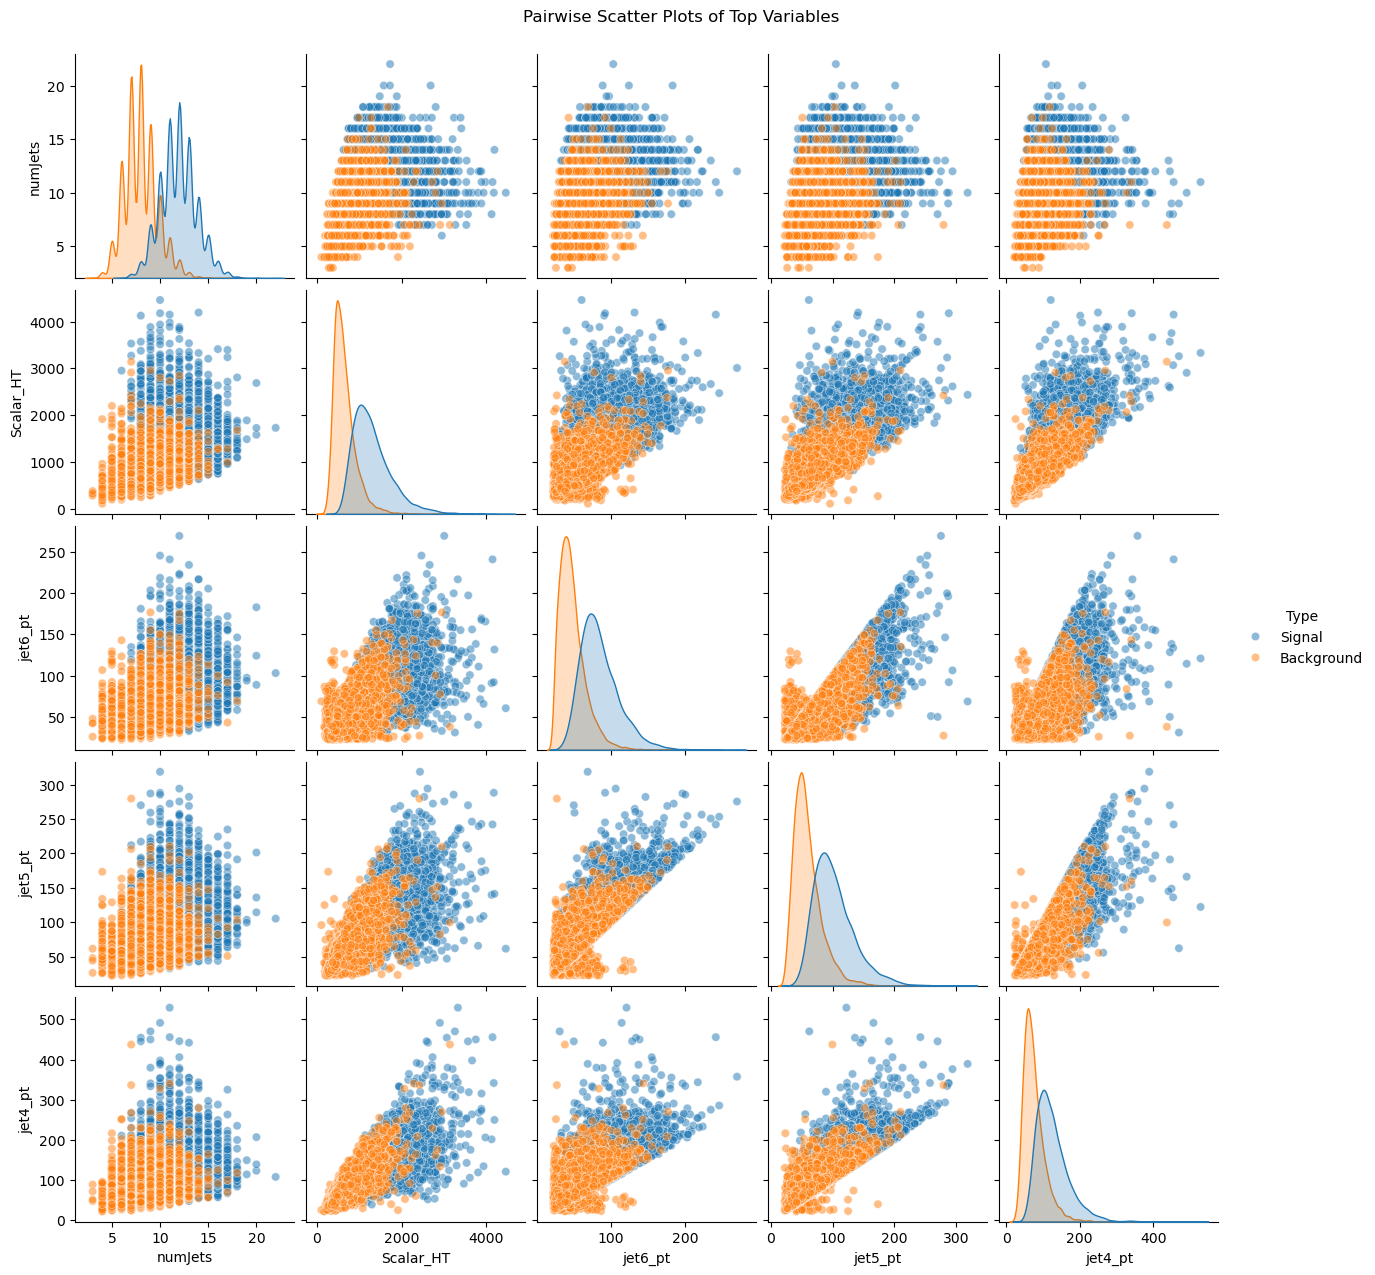

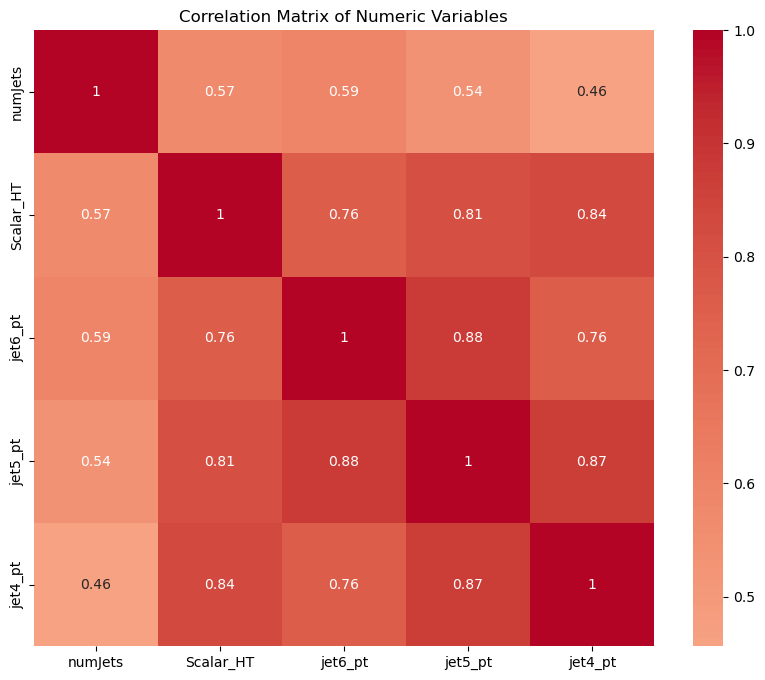

In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the directory to save the images
output_dir = '/home/syed/Downloads/Dataset/AnalysisResults/'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Load your data (if not already done)
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")

# Combine the data into a single DataFrame
signal_df['Type'] = 'Signal'
background_df['Type'] = 'Background'
combined_df = pd.concat([signal_df, background_df], ignore_index=True)

# Specify the top variables based on previous analysis
top_variables =  ['numJets', 'Scalar_HT', 'jet6_pt', 'jet5_pt', 'jet4_pt']

# Create pairwise scatter plots for the top variables
pairplot = sns.pairplot(combined_df, vars=top_variables, hue='Type', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Scatter Plots of Top Variables', y=1.02)

# Save as a high-resolution image
pairplot_file_path = os.path.join(output_dir, 'pairwise_scatter_plots.png')
pairplot.savefig(pairplot_file_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Create a correlation heatmap for the top variables
plt.figure(figsize=(10, 8))
corr_matrix = combined_df[top_variables].corr()
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')

# Save as a high-resolution image
heatmap_file_path = os.path.join(output_dir, 'correlation_heatmap.png')
plt.savefig(heatmap_file_path, dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()


In [15]:
# Required imports
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the signal and background data
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")

# Label the events: 1 for signal, 0 for background
signal_df['Type'] = 1
background_df['Type'] = 0

# Combine the DataFrames
combined_df = pd.concat([signal_df, background_df], ignore_index=True)

# Define feature columns (all variables except 'Type')
features = combined_df.columns.drop('Type')
X = combined_df[features]
y = combined_df['Type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Boosted Decision Tree Classifier with regularization to prevent overfitting
bdt_model = GradientBoostingClassifier(
    n_estimators=50,            # Fewer trees to reduce complexity
    learning_rate=0.05,         # Lower learning rate for careful learning
    max_depth=3,                # Shallow trees for better generalization
    min_samples_split=10,       # Minimum samples needed to split a node
    min_samples_leaf=5,         # Minimum samples needed in a leaf node
    subsample=0.8,              # Subsampling to introduce randomness
    random_state=42
)
bdt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bdt_model.predict(X_test)
y_proba = bdt_model.predict_proba(X_test)[:, 1]

# Evaluate the model performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Background', 'Signal']))
print("\nAUC Score:", roc_auc_score(y_test, y_proba))


Model Accuracy: 0.9076666666666666

Classification Report:
               precision    recall  f1-score   support

  Background       0.92      0.89      0.91      2983
      Signal       0.90      0.92      0.91      3017

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000


AUC Score: 0.9634492707599166


In [24]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Load the signal and background data
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")

# Label the events: 1 for signal, 0 for background
signal_df['Type'] = 1
background_df['Type'] = 0

# Combine the DataFrames
combined_df = pd.concat([signal_df, background_df], ignore_index=True)

# Define feature columns (all variables except 'Type')
features = combined_df.columns.drop('Type')
X = combined_df[features]
y = combined_df['Type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Record the start time for training
start_time = time.time()

# Train a Boosted Decision Tree Classifier with regularization to prevent overfitting
bdt_model = GradientBoostingClassifier(
    n_estimators=50,            
    learning_rate=0.05,         
    max_depth=3,                
    min_samples_split=10,       
    min_samples_leaf=5,         
    subsample=0.8,              
    random_state=42
)
bdt_model.fit(X_train, y_train)

# Record the end time for training
end_time = time.time()

# Predict on the test set
y_pred = bdt_model.predict(X_test)
y_proba = bdt_model.predict_proba(X_test)[:, 1]

# Model performance metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Background', 'Signal'], output_dict=True)
auc_score = roc_auc_score(y_test, y_proba)

# Prepare summary data
summary_data = {
    'Metric': [
        'Total Data Points', 
        'Training Data Points', 
        'Test Data Points', 
        'Model Accuracy', 
        'AUC Score', 
        'Training Time (seconds)'
    ],
    'Value': [
        len(combined_df),
        len(X_train),
        len(X_test),
        f"{accuracy:.4f}",
        f"{auc_score:.4f}",
        f"{end_time - start_time:.2f}"
    ]
}

# Convert summary data to DataFrame
summary_df = pd.DataFrame(summary_data)

# Save summary table as an image
output_dir = "/home/syed/Downloads/Dataset/summary"
os.makedirs(output_dir, exist_ok=True)
summary_fig_path = os.path.join(output_dir, "bdt_model_summary.png")

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.savefig(summary_fig_path, dpi=300, bbox_inches="tight")
plt.close(fig)  # Close the plot to free memory

print(f"Model summary table saved to: {summary_fig_path}")


Model summary table saved to: /home/syed/Downloads/Dataset/summary/bdt_model_summary.png


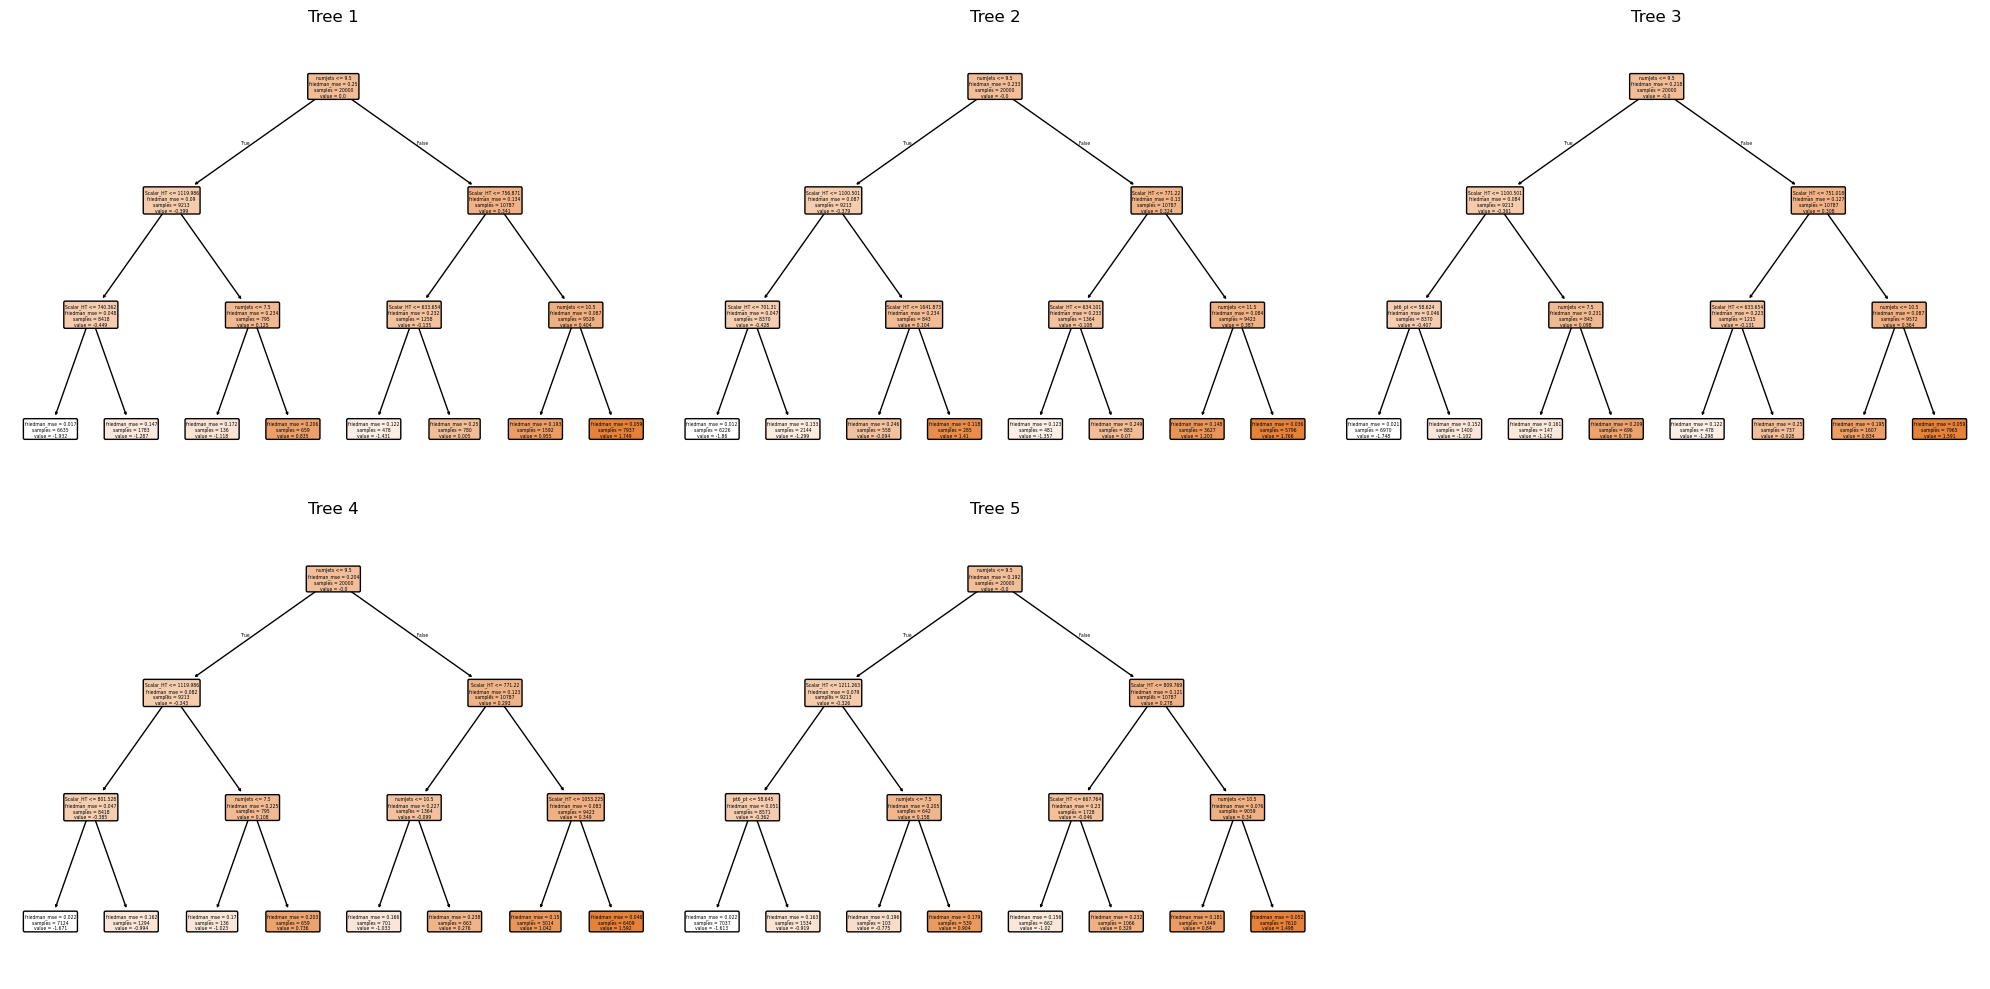

In [16]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import math

# Load the data as previously done
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")

# Label and combine the data
signal_df['Type'] = 1
background_df['Type'] = 0
combined_df = pd.concat([signal_df, background_df], ignore_index=True)

# Define features and target
features = combined_df.columns.drop('Type')
X = combined_df[features]
y = combined_df['Type']

# Train a Boosted Decision Tree model
bdt_model = GradientBoostingClassifier(
    n_estimators=5, learning_rate=0.05, max_depth=3, random_state=42  # Set n_estimators to a manageable number for visualization
)
bdt_model.fit(X, y)

# Set up the grid dimensions for plotting all trees
num_trees = bdt_model.n_estimators
cols = 3  # You can adjust based on how many trees you want per row
rows = math.ceil(num_trees / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))

for i in range(num_trees):
    row, col = divmod(i, cols)
    ax = axes[row, col] if rows > 1 else axes[col]
    
    # Plot each tree
    plot_tree(bdt_model.estimators_[i, 0], feature_names=features, filled=True, rounded=True, ax=ax)
    ax.set_title(f"Tree {i + 1}")

# Hide any unused subplots if the grid is not completely filled
for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import math
import os

# Load the signal and background data
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")

# Label and combine the data
signal_df['Type'] = 1
background_df['Type'] = 0
combined_df = pd.concat([signal_df, background_df], ignore_index=True)

# Define features and target
features = combined_df.columns.drop('Type')
X = combined_df[features]
y = combined_df['Type']

# Train a Boosted Decision Tree model
bdt_model = GradientBoostingClassifier(
    n_estimators=5, learning_rate=0.05, max_depth=3, random_state=42
)
bdt_model.fit(X, y)

# Create a directory to save the images if it doesn't already exist
output_dir = "/home/syed/Downloads/Dataset/trees_images"
os.makedirs(output_dir, exist_ok=True)

# Plot and save each tree
for i in range(bdt_model.n_estimators):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot each tree individually
    plot_tree(bdt_model.estimators_[i, 0], feature_names=features, filled=True, rounded=True, ax=ax)
    ax.set_title(f"Tree {i + 1}")

    # Save each plot as a separate image file
    fig_path = os.path.join(output_dir, f"tree_{i + 1}.png")
    plt.savefig(fig_path, dpi=300, bbox_inches="tight")
    plt.close(fig)  # Close the plot to free memory

print(f"All trees have been saved to {output_dir}")


All trees have been saved to /home/syed/Downloads/Dataset/trees_images


In [17]:
# List of top variables to train the model on
top_variables = ['numJets', 'Scalar_HT', 'jet6_pt', 'jet5_pt', 'jet4_pt']

# Filter the data to only include the top variables
X_top = combined_df[top_variables]
y_top = combined_df['Type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y_top, test_size=0.3, random_state=42)

# Train a Gradient Boosting Classifier on the selected features (top variables)
from sklearn.ensemble import GradientBoostingClassifier

# Create and fit the model
clf_top = GradientBoostingClassifier(random_state=42)
clf_top.fit(X_train, y_train)

# Evaluate the model
y_pred = clf_top.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model on top variables: {accuracy:.4f}")

# Optional: Feature importance (although only using top variables)
importances = clf_top.feature_importances_
importance_df_top = pd.DataFrame({'Variable': top_variables, 'Importance': importances})
importance_df_top = importance_df_top.sort_values(by='Importance', ascending=False)

print("Feature Importances (Top Variables):")
print(importance_df_top)


Accuracy of the model on top variables: 0.9057
Feature Importances (Top Variables):
    Variable  Importance
0    numJets    0.705129
1  Scalar_HT    0.255738
2    jet6_pt    0.029661
3    jet5_pt    0.006219
4    jet4_pt    0.003252


In [23]:
import pandas as pd
import time
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# Load and prepare data
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")
signal_df['Type'] = 1
background_df['Type'] = 0
combined_df = pd.concat([signal_df, background_df], ignore_index=True)

# Define top variables and target
top_variables = ['numJets', 'Scalar_HT', 'jet6_pt', 'jet5_pt', 'jet4_pt']
X_top = combined_df[top_variables]
y_top = combined_df['Type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_top, y_top, test_size=0.3, random_state=42)

# Record the start time for training
start_time = time.time()

# Train the Gradient Boosting Classifier
clf_top = GradientBoostingClassifier(random_state=42)
clf_top.fit(X_train, y_train)

# Record the end time for training
end_time = time.time()

# Predictions and accuracy
y_pred = clf_top.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Feature importances
importances = clf_top.feature_importances_
importance_df_top = pd.DataFrame({'Variable': top_variables, 'Importance': importances})
importance_df_top = importance_df_top.sort_values(by='Importance', ascending=False)

# Prepare summary data
summary_data = {
    'Metric': [
        'Total Data Points', 
        'Training Data Points', 
        'Test Data Points', 
        'Model Accuracy', 
        'Training Time (seconds)'
    ],
    'Value': [
        len(combined_df),
        len(X_train),
        len(X_test),
        f"{accuracy:.4f}",
        f"{end_time - start_time:.2f}"
    ]
}

# Convert summary data to DataFrame
summary_df = pd.DataFrame(summary_data)

# Save summary table as an image
output_dir = "/home/syed/Downloads/Dataset/summary"
os.makedirs(output_dir, exist_ok=True)
summary_fig_path = os.path.join(output_dir, "model_summary.png")

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.savefig(summary_fig_path, dpi=300, bbox_inches="tight")
plt.close(fig)  # Close the plot to free memory

print(f"Model summary table saved to: {summary_fig_path}")


Model summary table saved to: /home/syed/Downloads/Dataset/summary/model_summary.png


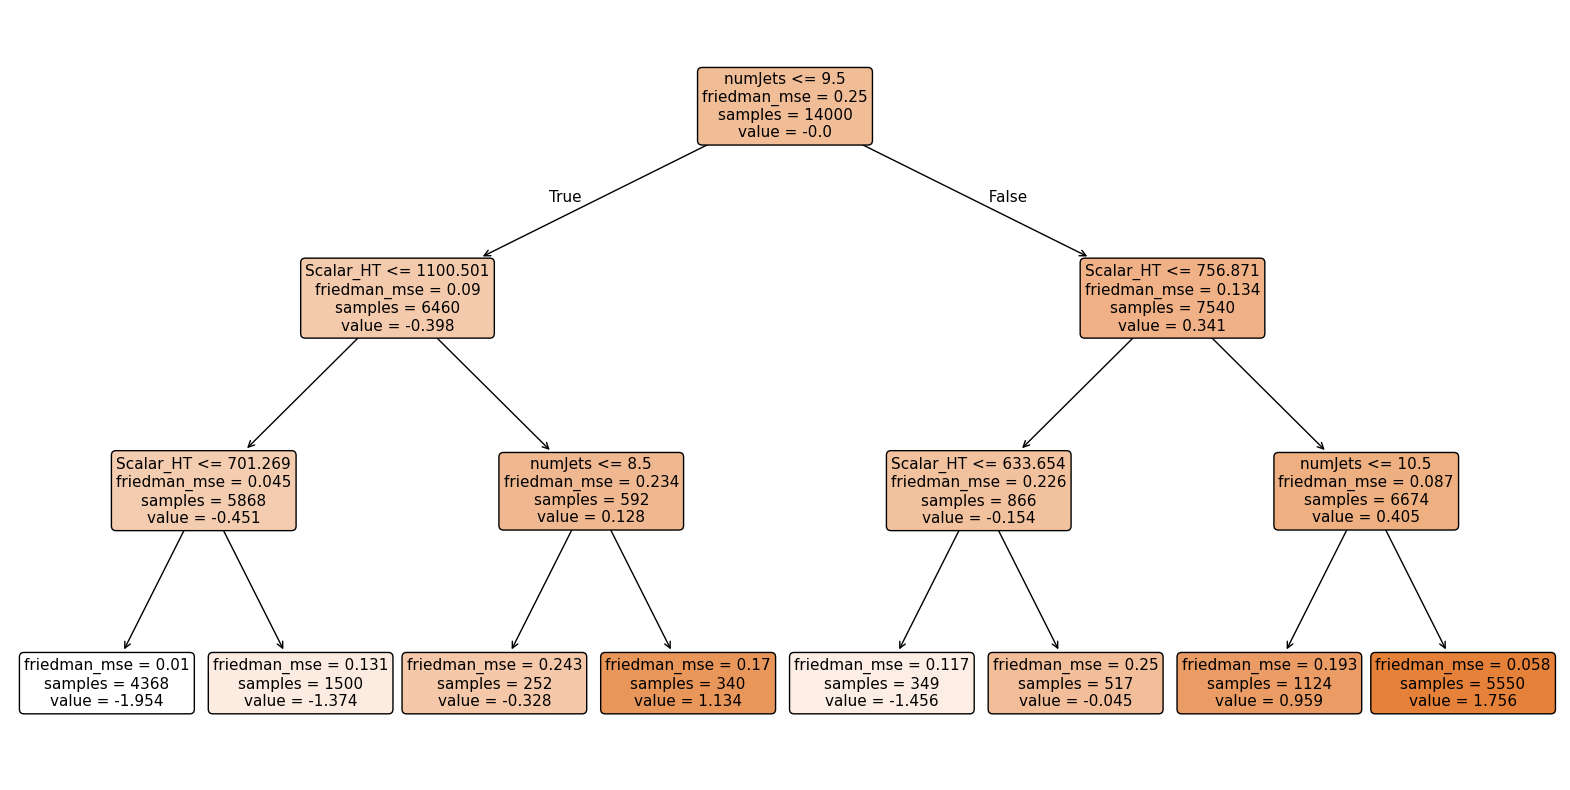

In [20]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree

# Define top features based on your previous findings
top_features = ['numJets', 'Scalar_HT', 'jet6_pt', 'jet5_pt', 'jet4_pt']

# Load data (Signal and Background datasets)
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")

# Label the events: 1 for signal, 0 for background
signal_df['Type'] = 1
background_df['Type'] = 0

# Combine the DataFrames
combined_df = pd.concat([signal_df, background_df], ignore_index=True)

# Prepare the features (top features only) and labels
X = combined_df[top_features]
y = combined_df['Type']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gradient Boosting Classifier on the top features
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Get the first tree in the model (the first estimator)
first_tree = gb_clf.estimators_[0, 0]

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(first_tree, filled=True, feature_names=top_features, class_names=['Background', 'Signal'], rounded=True)
plt.show()


In [22]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import os

# Load the signal and background data
signal_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/SignalTTree.xlsx")
background_df = pd.read_excel("/home/syed/Downloads/Dataset/weights/HBackgroundTTree.xlsx")

# Label and combine the data
signal_df['Type'] = 1
background_df['Type'] = 0
combined_df = pd.concat([signal_df, background_df], ignore_index=True)

# Define features and target
features = combined_df.columns.drop('Type')
X = combined_df[features]
y = combined_df['Type']

# Train a single Decision Tree
bdt_model = GradientBoostingClassifier(
    n_estimators=1, learning_rate=0.05, max_depth=3, random_state=42
)
bdt_model.fit(X, y)

# Set output directory and file path for saving the tree image
output_dir = "/home/syed/Downloads/Dataset/trees_images"
os.makedirs(output_dir, exist_ok=True)
fig_path = os.path.join(output_dir, "single_tree.png")

# Plot the single tree and save it as an image
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(bdt_model.estimators_[0, 0], feature_names=features, filled=True, rounded=True, ax=ax)
ax.set_title("Single Decision Tree")

# Save the plot as a high-resolution image
plt.savefig(fig_path, dpi=300, bbox_inches="tight")
plt.close(fig)  # Close the plot to free memory

print(f"The tree has been saved to {fig_path}")


The tree has been saved to /home/syed/Downloads/Dataset/trees_images/single_tree.png
